### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from Utils import *

data_type_list = ['ADNI', 'ROSMAP', 'BRCA', 'KIRC', 'Colon']
mp_list = [1000, 2000, 3000]
model_list = ['SVM', '5', '10', '20', '30']
top_n_list = [5, 10, 20, 30]

### Check Feature Selection Performance

In [2]:
for data_type in data_type_list:
    for mp in mp_list:
        for top_n in top_n_list:
            print('Data Type: {}, MP: {}, Top n: {}'.format(data_type, mp, top_n))
            check_feature_selection_performance(data_type, mp, top_n)
            print('\n\n')

Data Type: ADNI, MP: 1000, Top n: 5
Check Best Hyperparmeter Performance
Test BA: 0.802±0.101, F1: 0.719±0.171, AUC: 0.917±0.031, MCC: 0.664±0.183
Reproduction
Test BA: 0.802±0.101, F1: 0.719±0.171, AUC: 0.917±0.031, MCC: 0.664±0.183



Data Type: ADNI, MP: 1000, Top n: 10
Check Best Hyperparmeter Performance
Test BA: 0.819±0.091, F1: 0.751±0.148, AUC: 0.920±0.024, MCC: 0.698±0.165
Reproduction
Test BA: 0.819±0.091, F1: 0.751±0.148, AUC: 0.920±0.024, MCC: 0.698±0.165



Data Type: ADNI, MP: 1000, Top n: 20
Check Best Hyperparmeter Performance
Test BA: 0.852±0.063, F1: 0.804±0.099, AUC: 0.934±0.018, MCC: 0.748±0.132
Reproduction
Test BA: 0.852±0.063, F1: 0.804±0.099, AUC: 0.934±0.019, MCC: 0.748±0.132



Data Type: ADNI, MP: 1000, Top n: 30
Check Best Hyperparmeter Performance
Test BA: 0.872±0.059, F1: 0.825±0.085, AUC: 0.935±0.028, MCC: 0.772±0.115
Reproduction
Test BA: 0.872±0.059, F1: 0.825±0.085, AUC: 0.935±0.028, MCC: 0.773±0.115



Data Type: ADNI, MP: 2000, Top n: 5
Check Best Hy

Reproduction
Test BA: 0.779±0.055, F1: 0.779±0.054, AUC: 0.936±0.016, MCC: 0.694±0.071



Data Type: BRCA, MP: 3000, Top n: 30
Check Best Hyperparmeter Performance
Test BA: 0.773±0.047, F1: 0.782±0.055, AUC: 0.932±0.021, MCC: 0.692±0.080
Reproduction
Test BA: 0.773±0.047, F1: 0.782±0.055, AUC: 0.932±0.021, MCC: 0.692±0.080



Data Type: KIRC, MP: 1000, Top n: 5
Check Best Hyperparmeter Performance
Test BA: 0.653±0.027, F1: 0.746±0.035, AUC: 0.752±0.052, MCC: 0.348±0.056
Reproduction
Test BA: 0.653±0.027, F1: 0.747±0.035, AUC: 0.752±0.052, MCC: 0.348±0.056



Data Type: KIRC, MP: 1000, Top n: 10
Check Best Hyperparmeter Performance
Test BA: 0.639±0.021, F1: 0.699±0.020, AUC: 0.731±0.026, MCC: 0.278±0.042
Reproduction
Test BA: 0.639±0.021, F1: 0.699±0.020, AUC: 0.731±0.026, MCC: 0.278±0.042



Data Type: KIRC, MP: 1000, Top n: 20
Check Best Hyperparmeter Performance
Test BA: 0.650±0.037, F1: 0.719±0.033, AUC: 0.733±0.032, MCC: 0.307±0.073
Reproduction
Test BA: 0.650±0.037, F1: 0.719±0.03

### Visualization ROC Curve & PR-Curve

**Binary Class - ADNI, ROSMAP, KIRC, Colon - AUC curve**

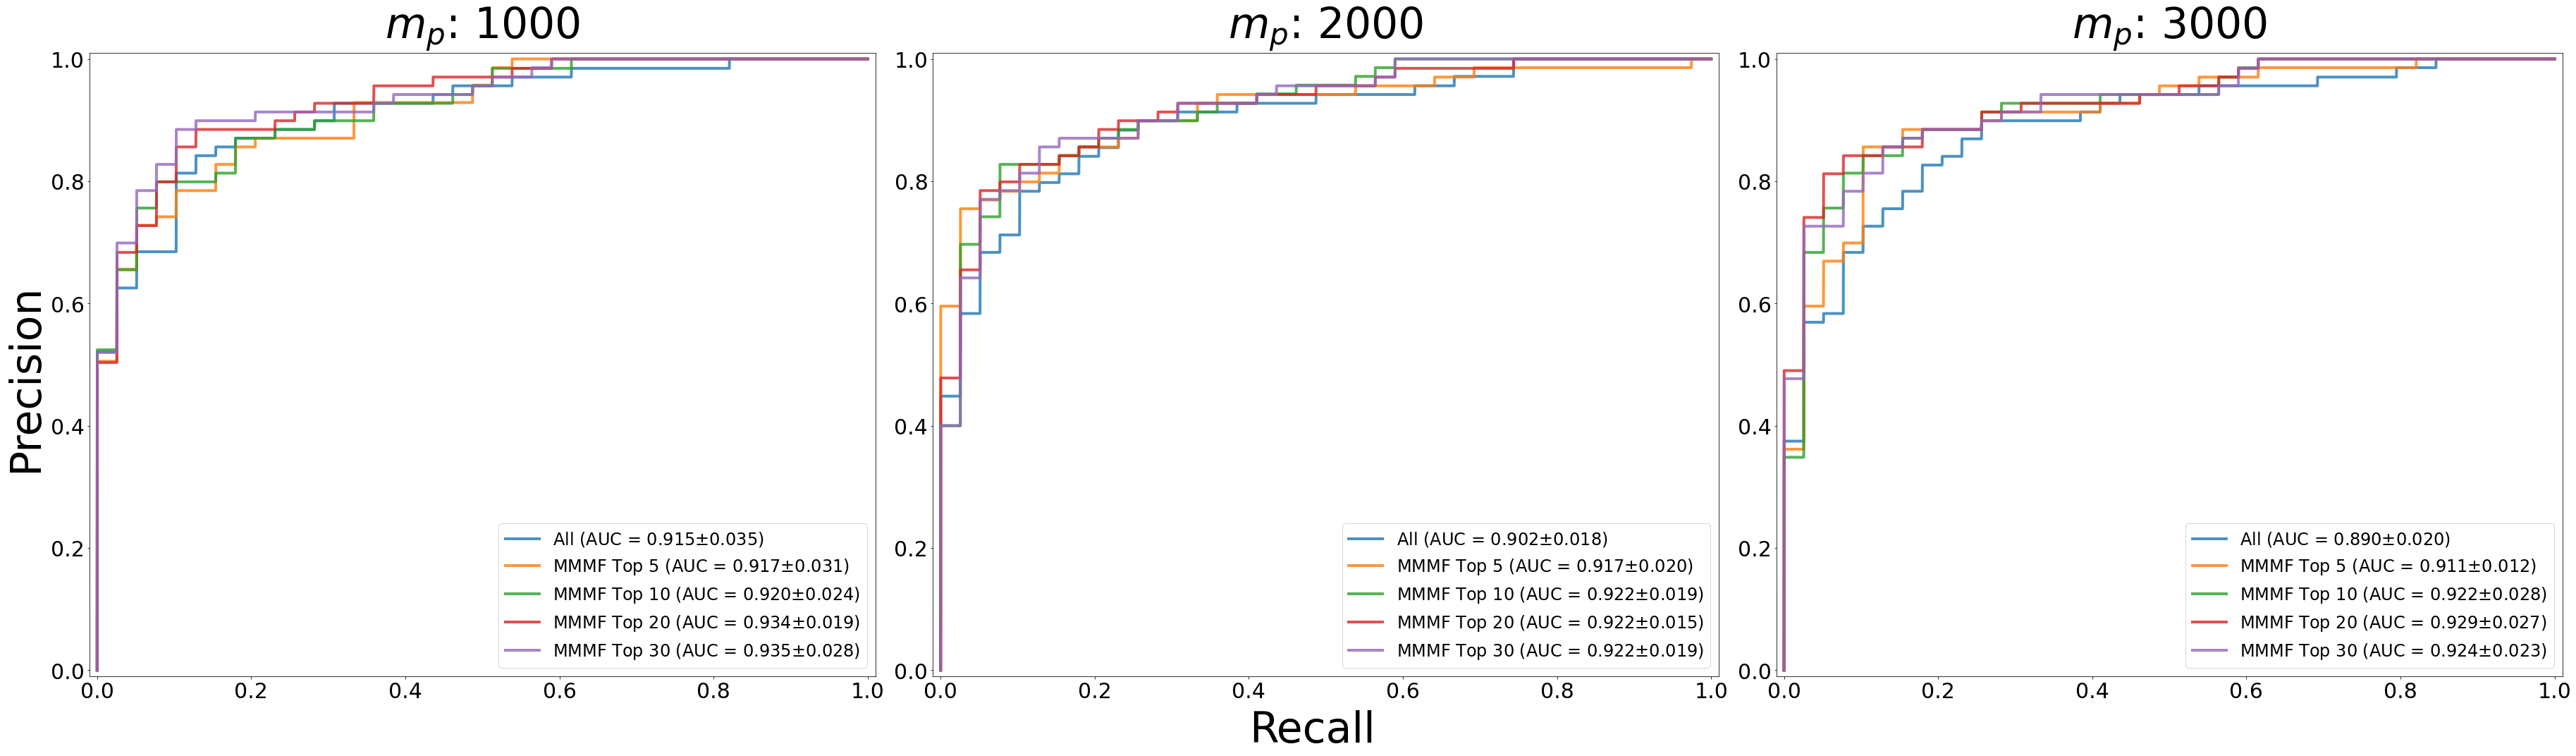

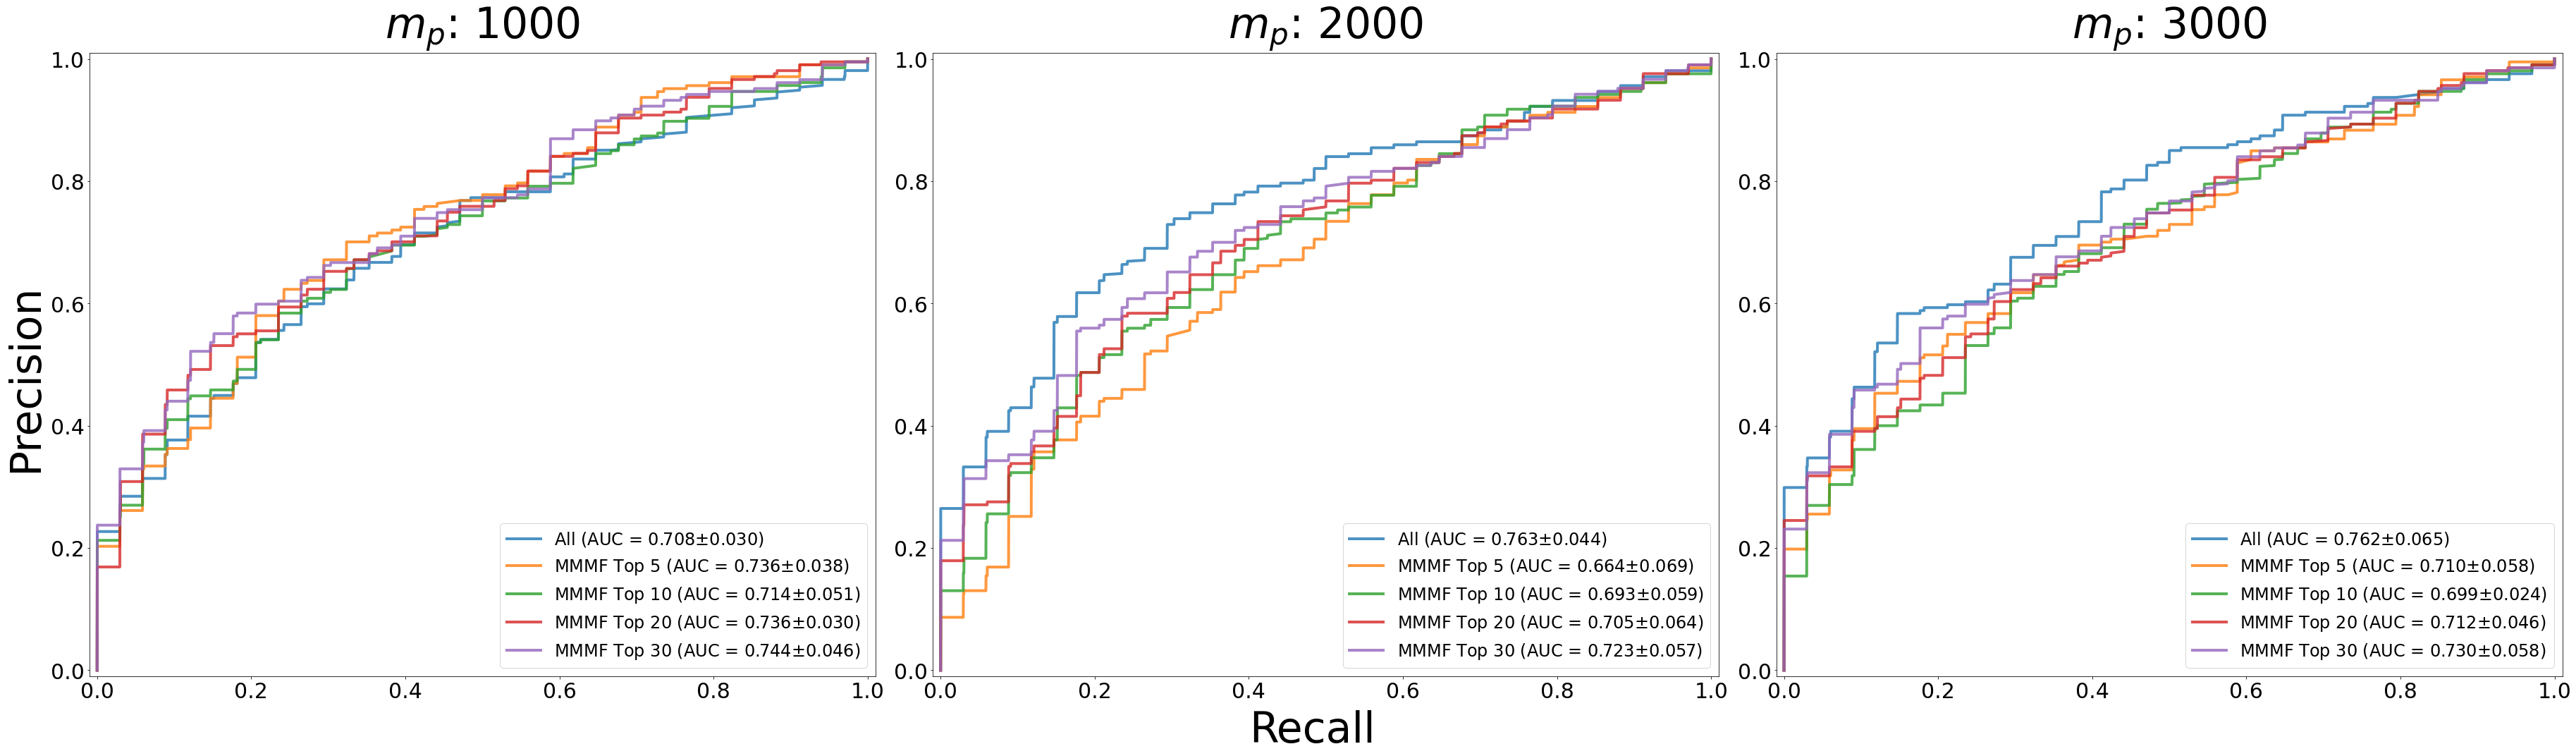

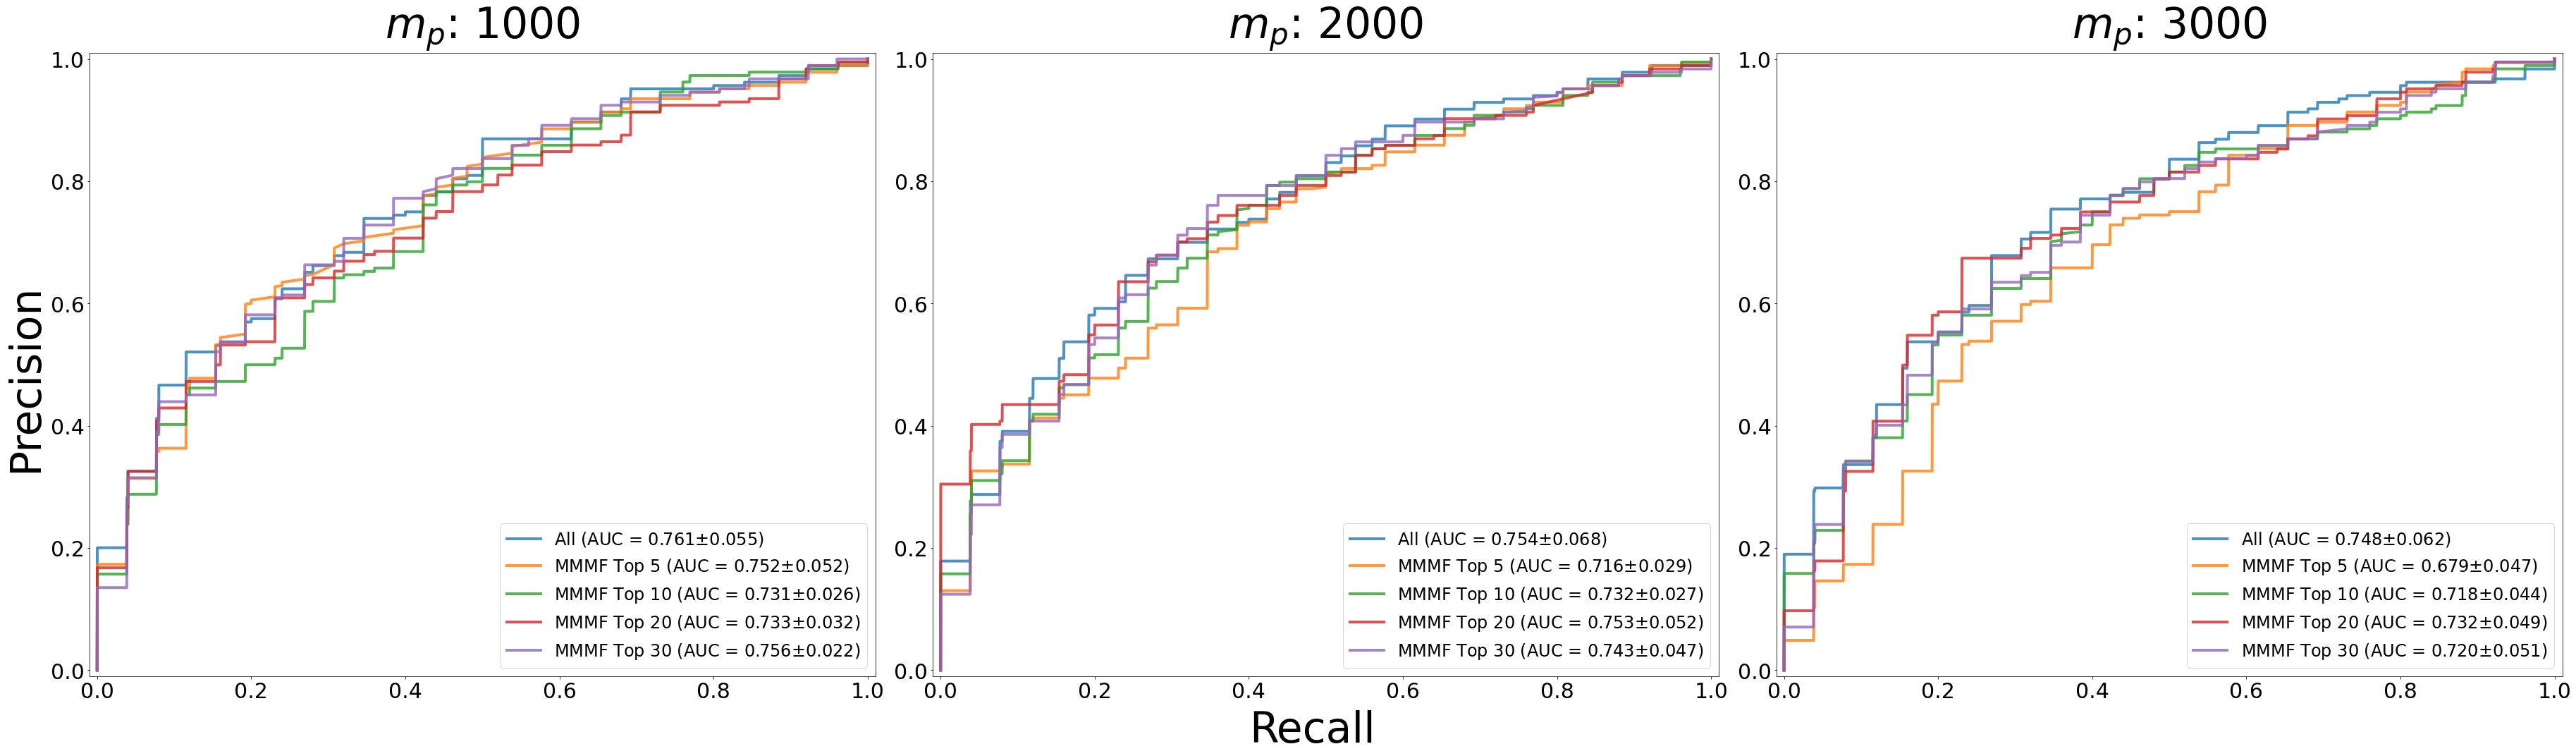

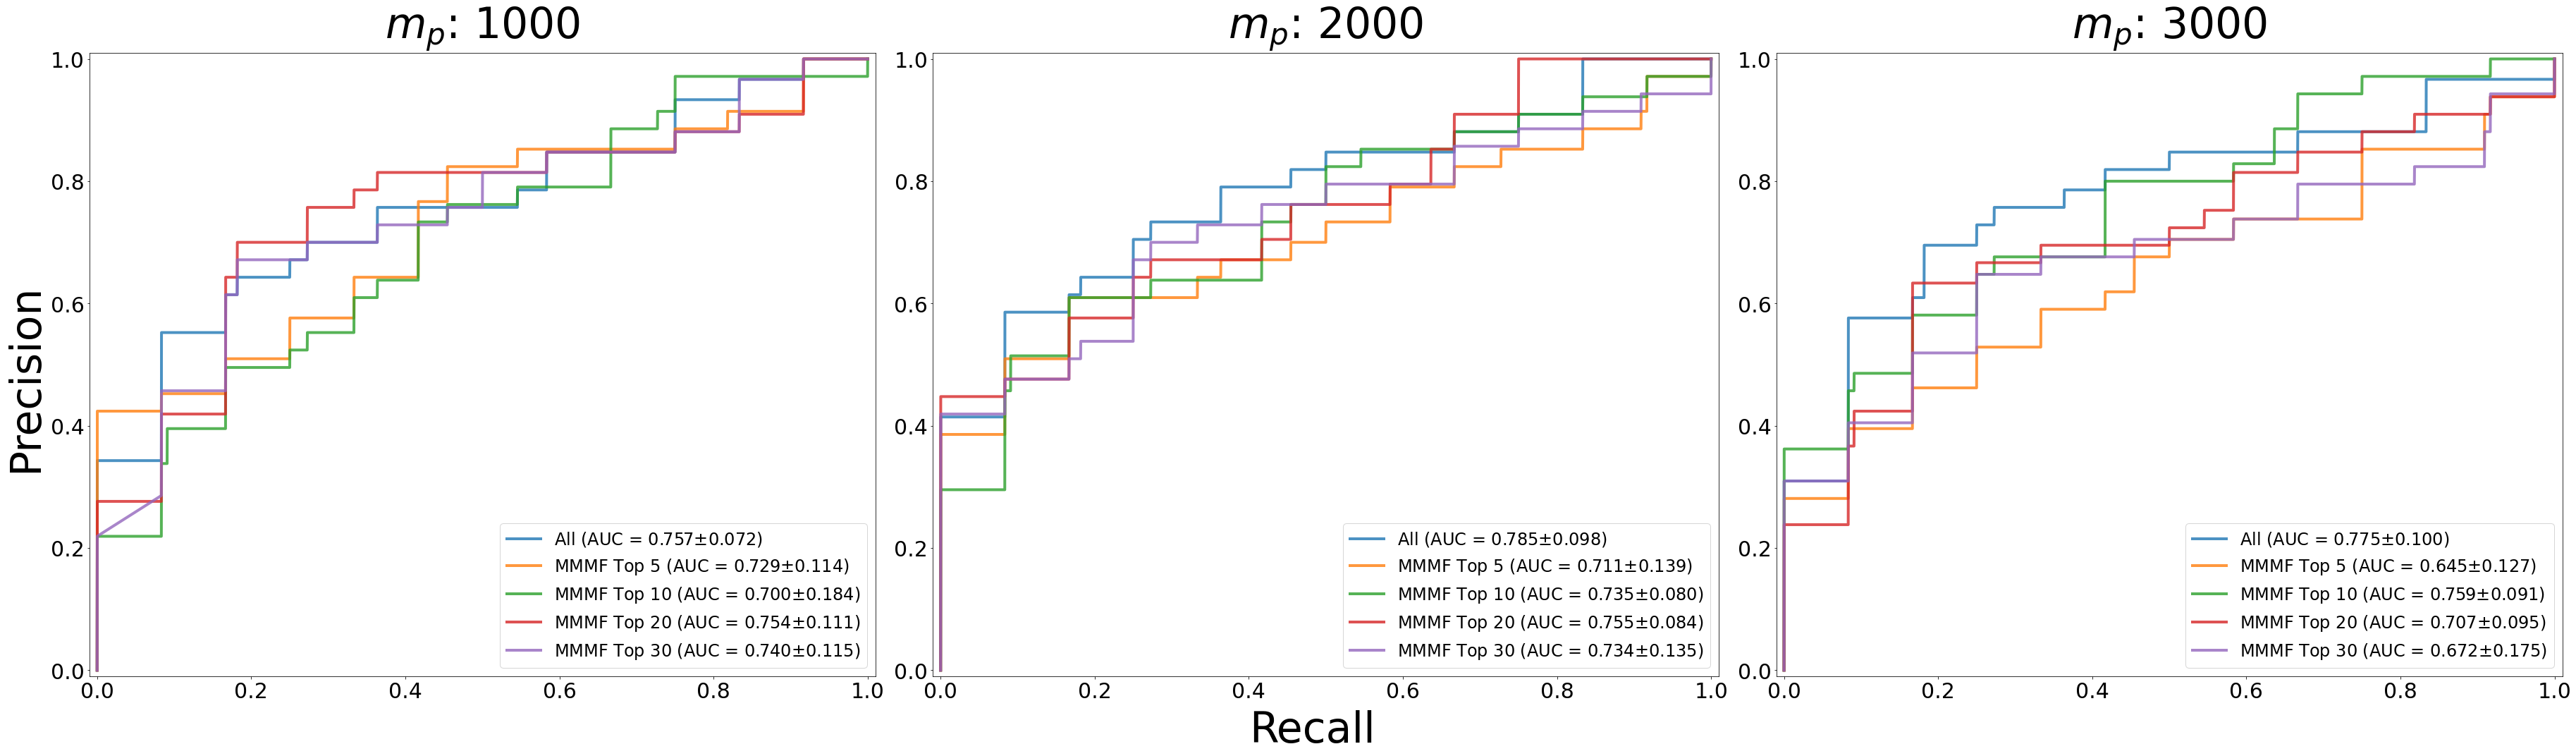

In [3]:
for data_type in ['ADNI', 'ROSMAP', 'KIRC', 'Colon']:
    fig, axes = plt.subplots(1, 3, sharex=True, figsize = (50, 15))
    for i, mp in enumerate(mp_list):
        ax = plt.subplot(1,3,i+1)
        feature_selection_roc_curve_plot(ax, data_type, mp, model_list)
        
    fig.supxlabel('Recall',fontsize=60)
    fig.text(-0.015, 0.5, 'Precision', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Binary Class - ADNI, ROSMAP, KIRC, Colon - PR curve**

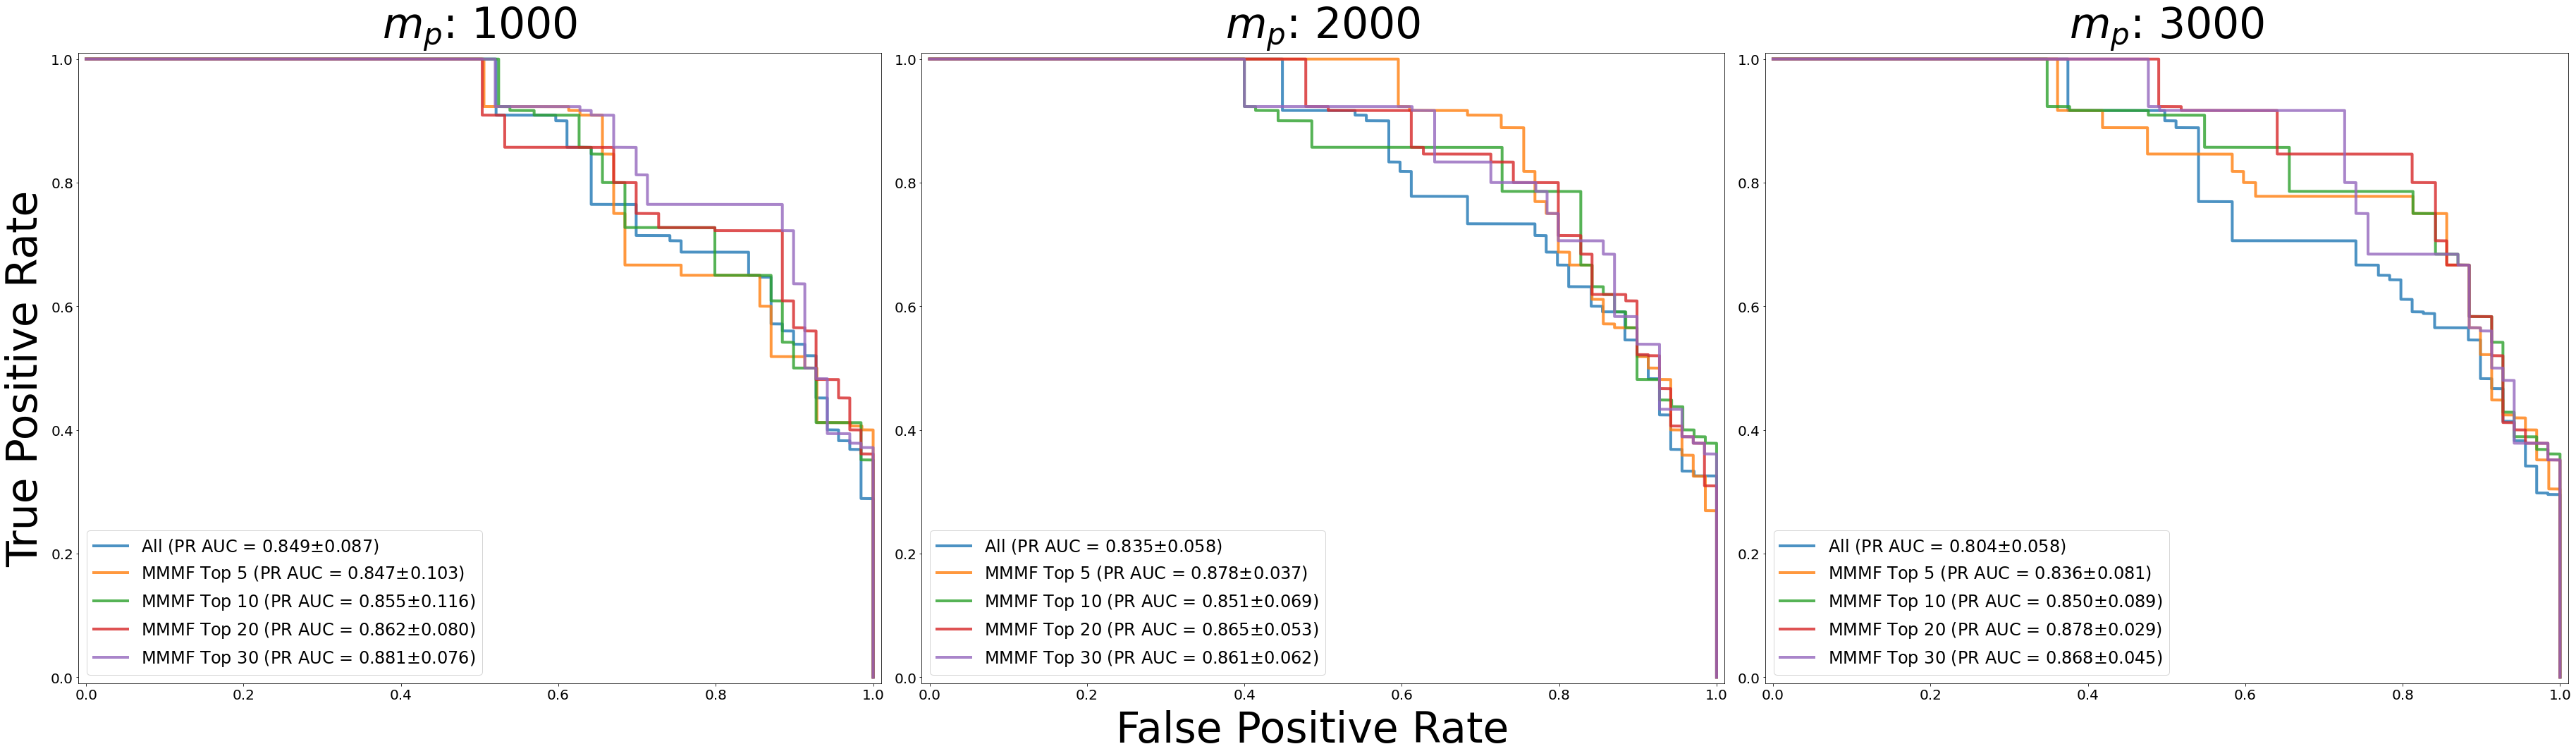

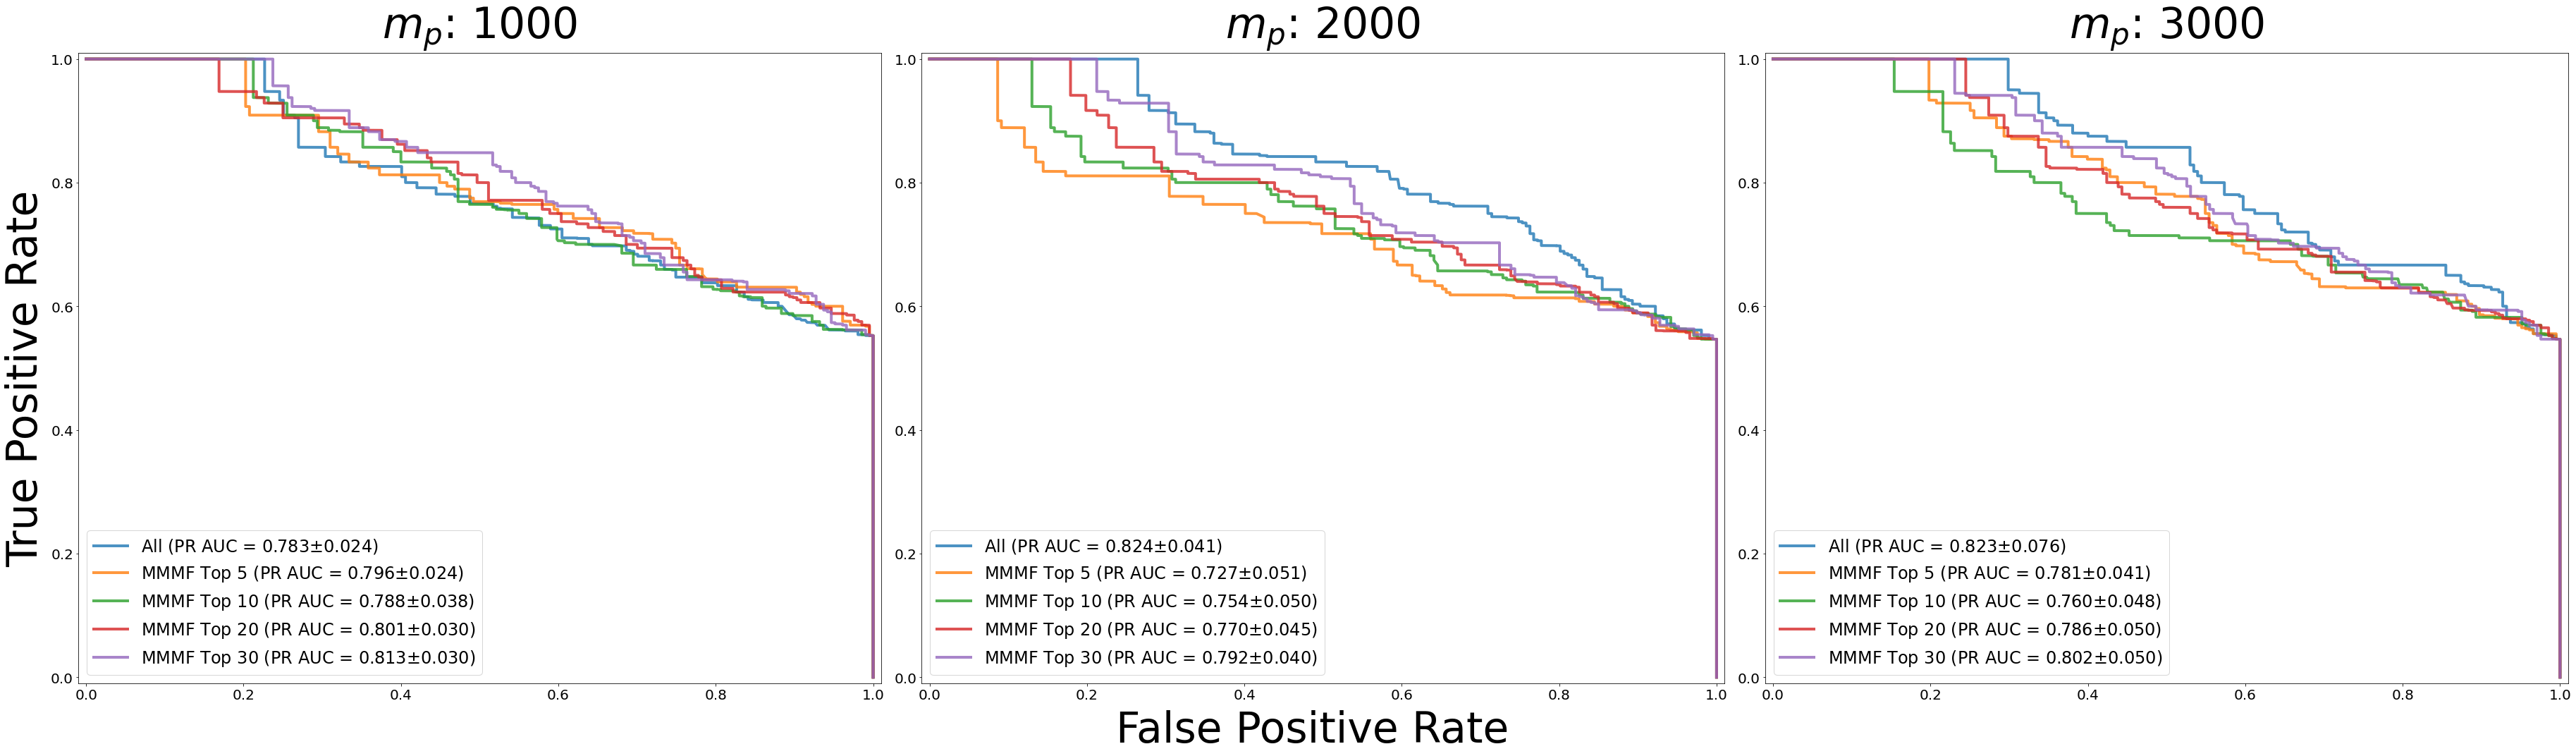

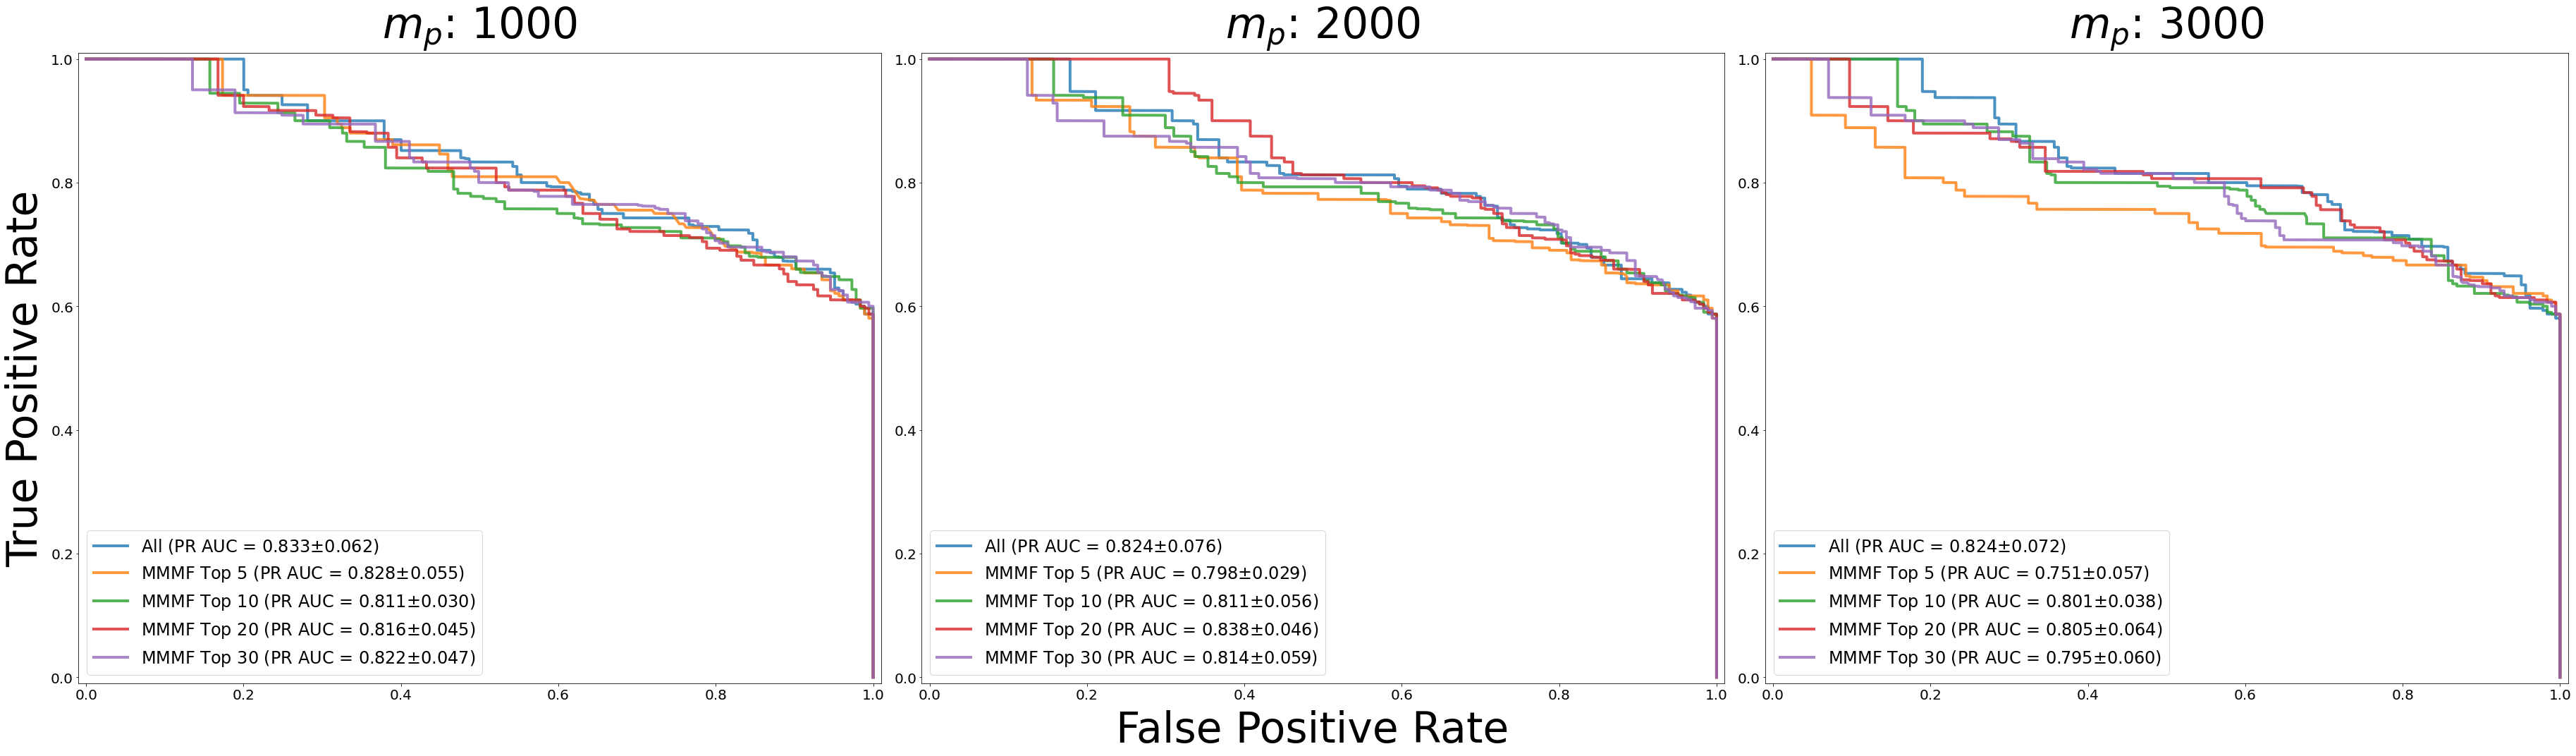

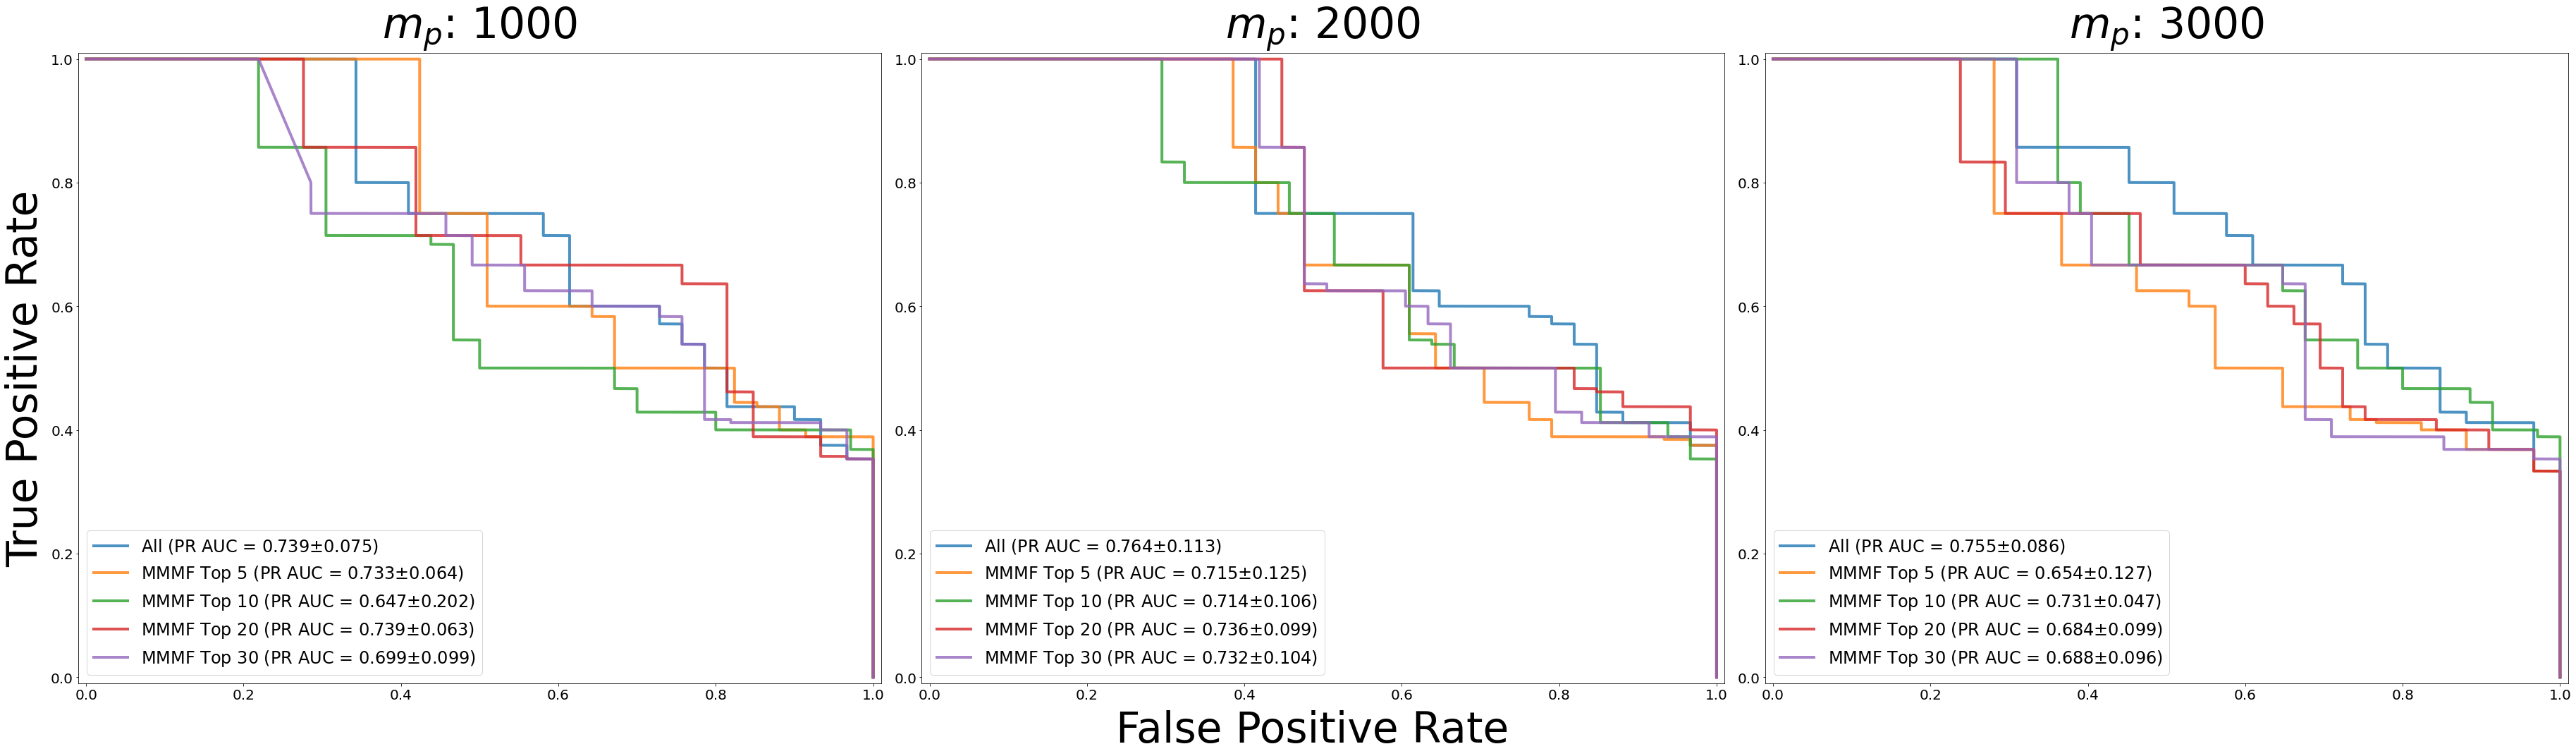

In [4]:
for data_type in ['ADNI', 'ROSMAP', 'KIRC', 'Colon']:
    fig, axes = plt.subplots(1, 3, sharex=True, figsize = (50, 15))
    for i, mp in enumerate(mp_list):
        ax = plt.subplot(1,3,i+1)
        feature_selection_pr_curve_plot(ax, data_type, mp, model_list)
        
    fig.supxlabel('False Positive Rate',fontsize=60)
    fig.text(-0.015, 0.5, 'True Positive Rate', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Multi Class - BRCA - AUC curve**
- 0: Luminal A
- 1: Luminal B
- 2: Basal-like
- 3: HER2-enriched

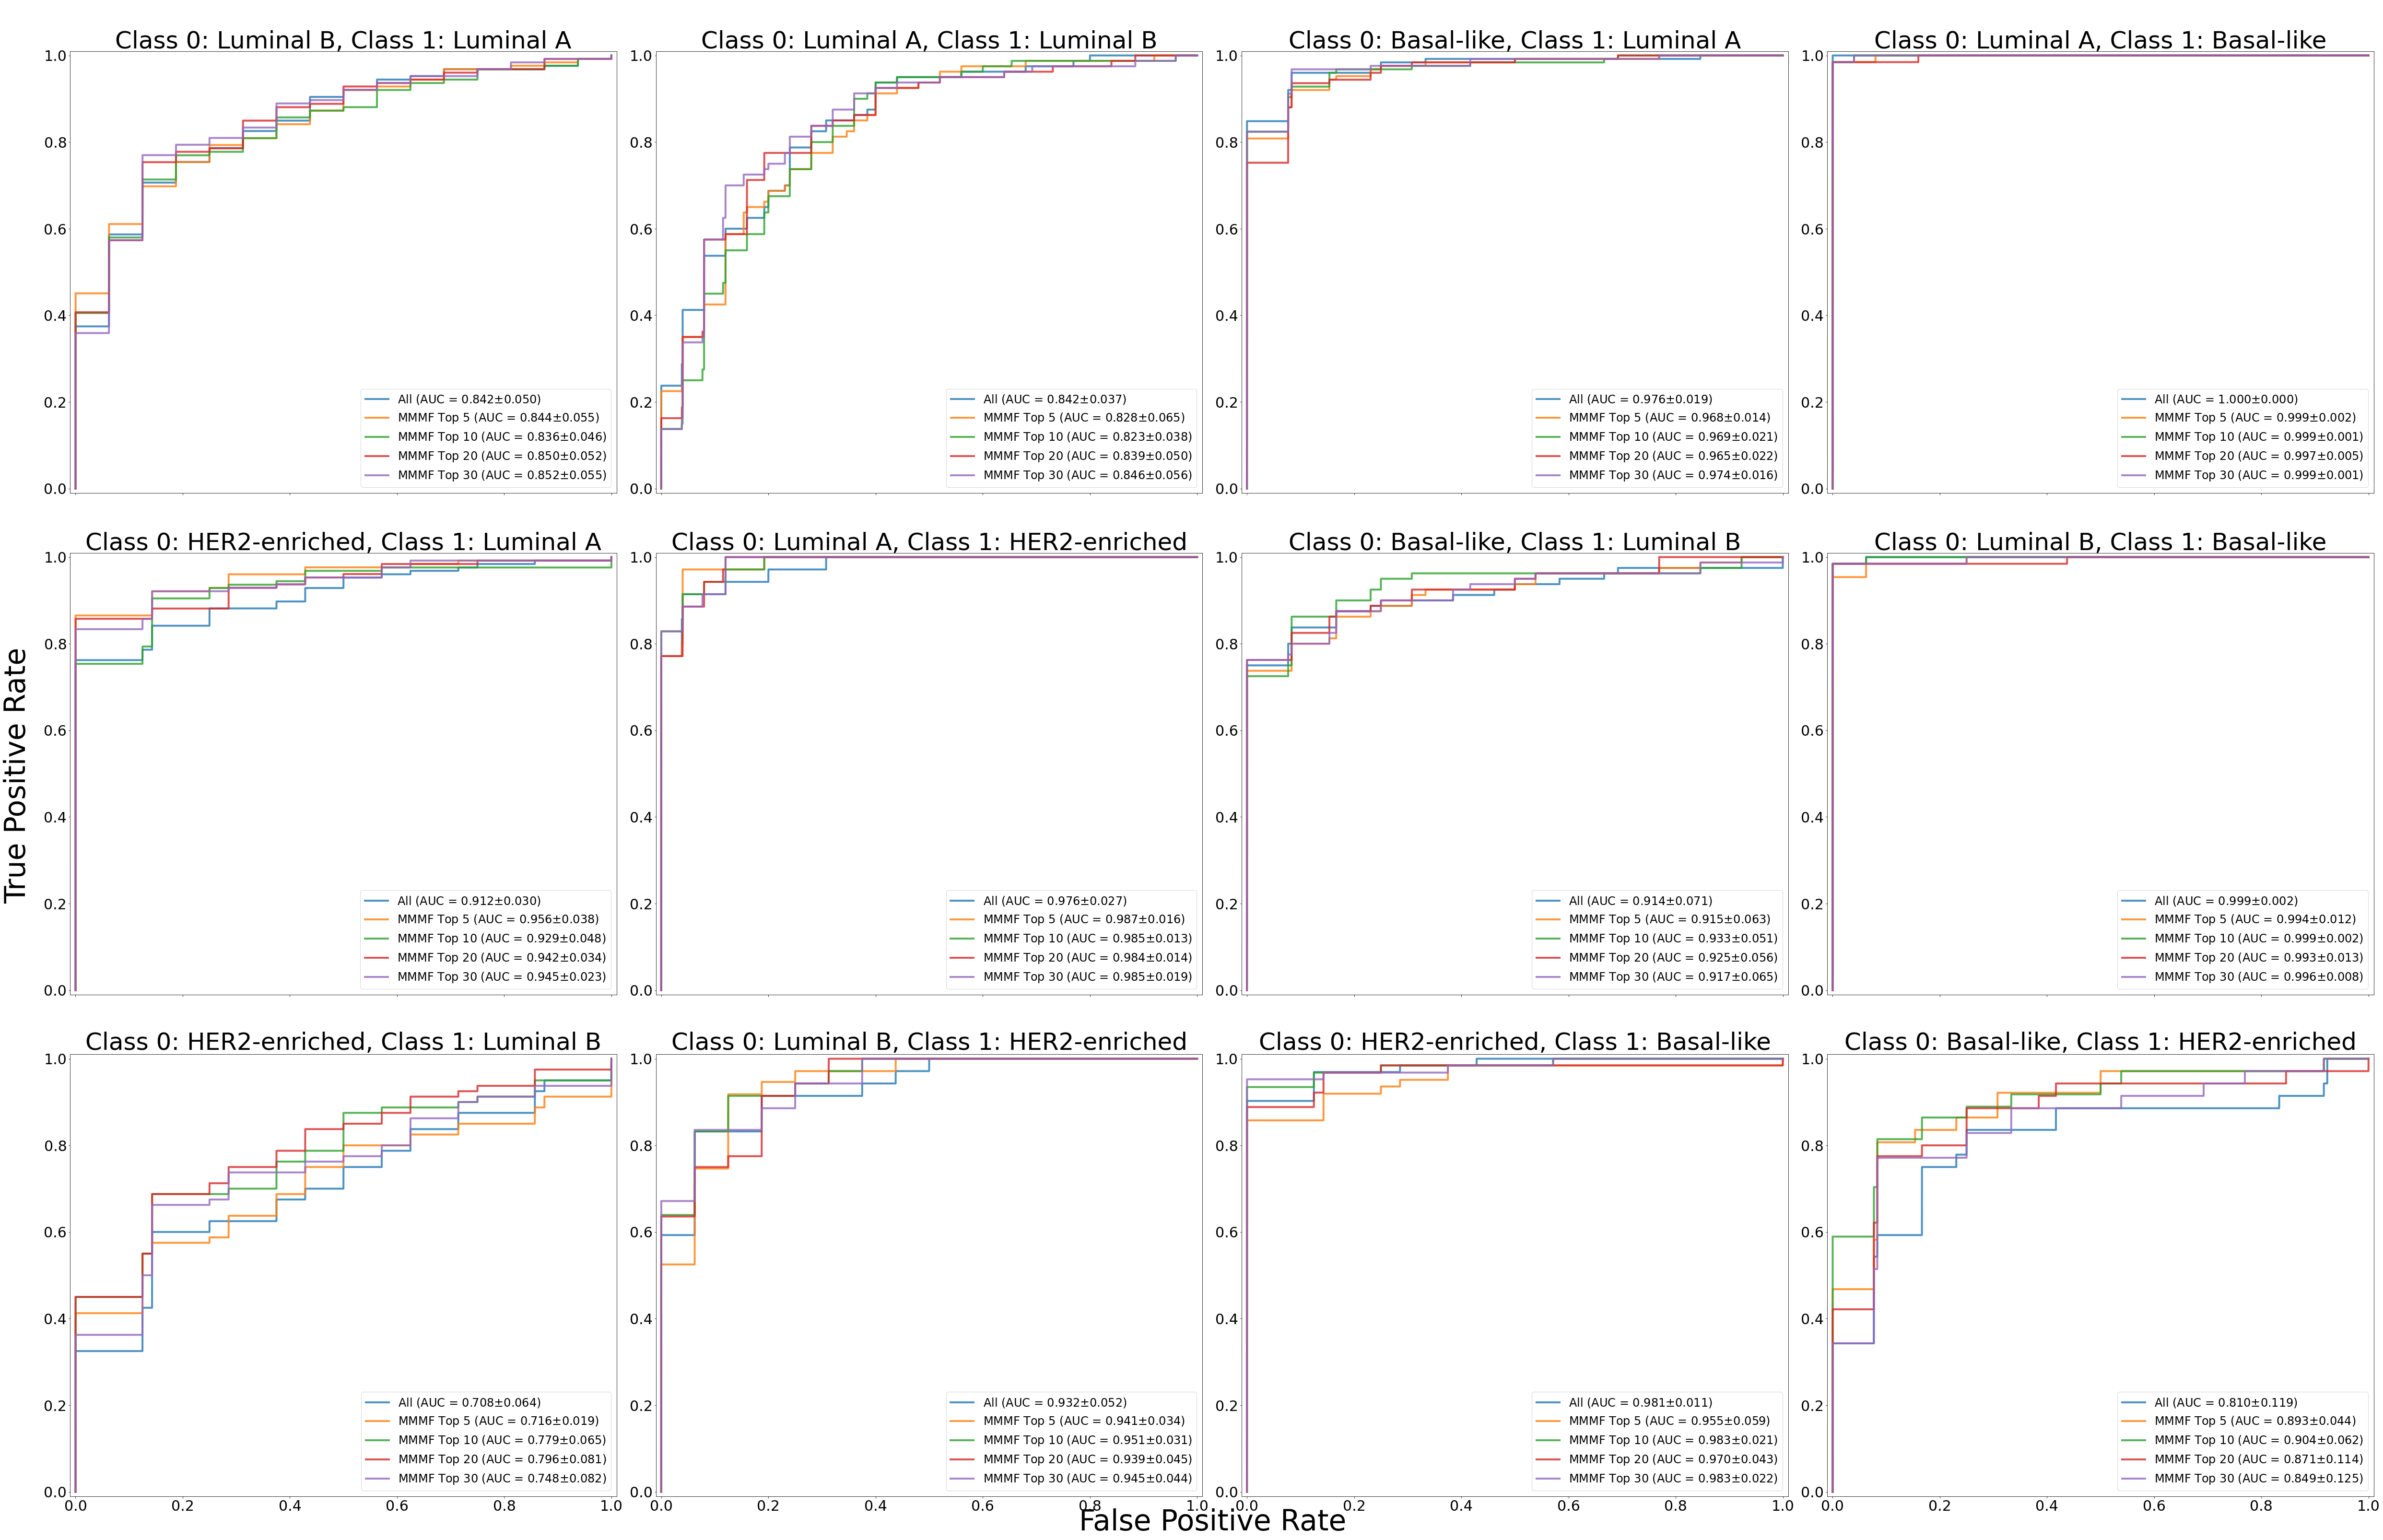

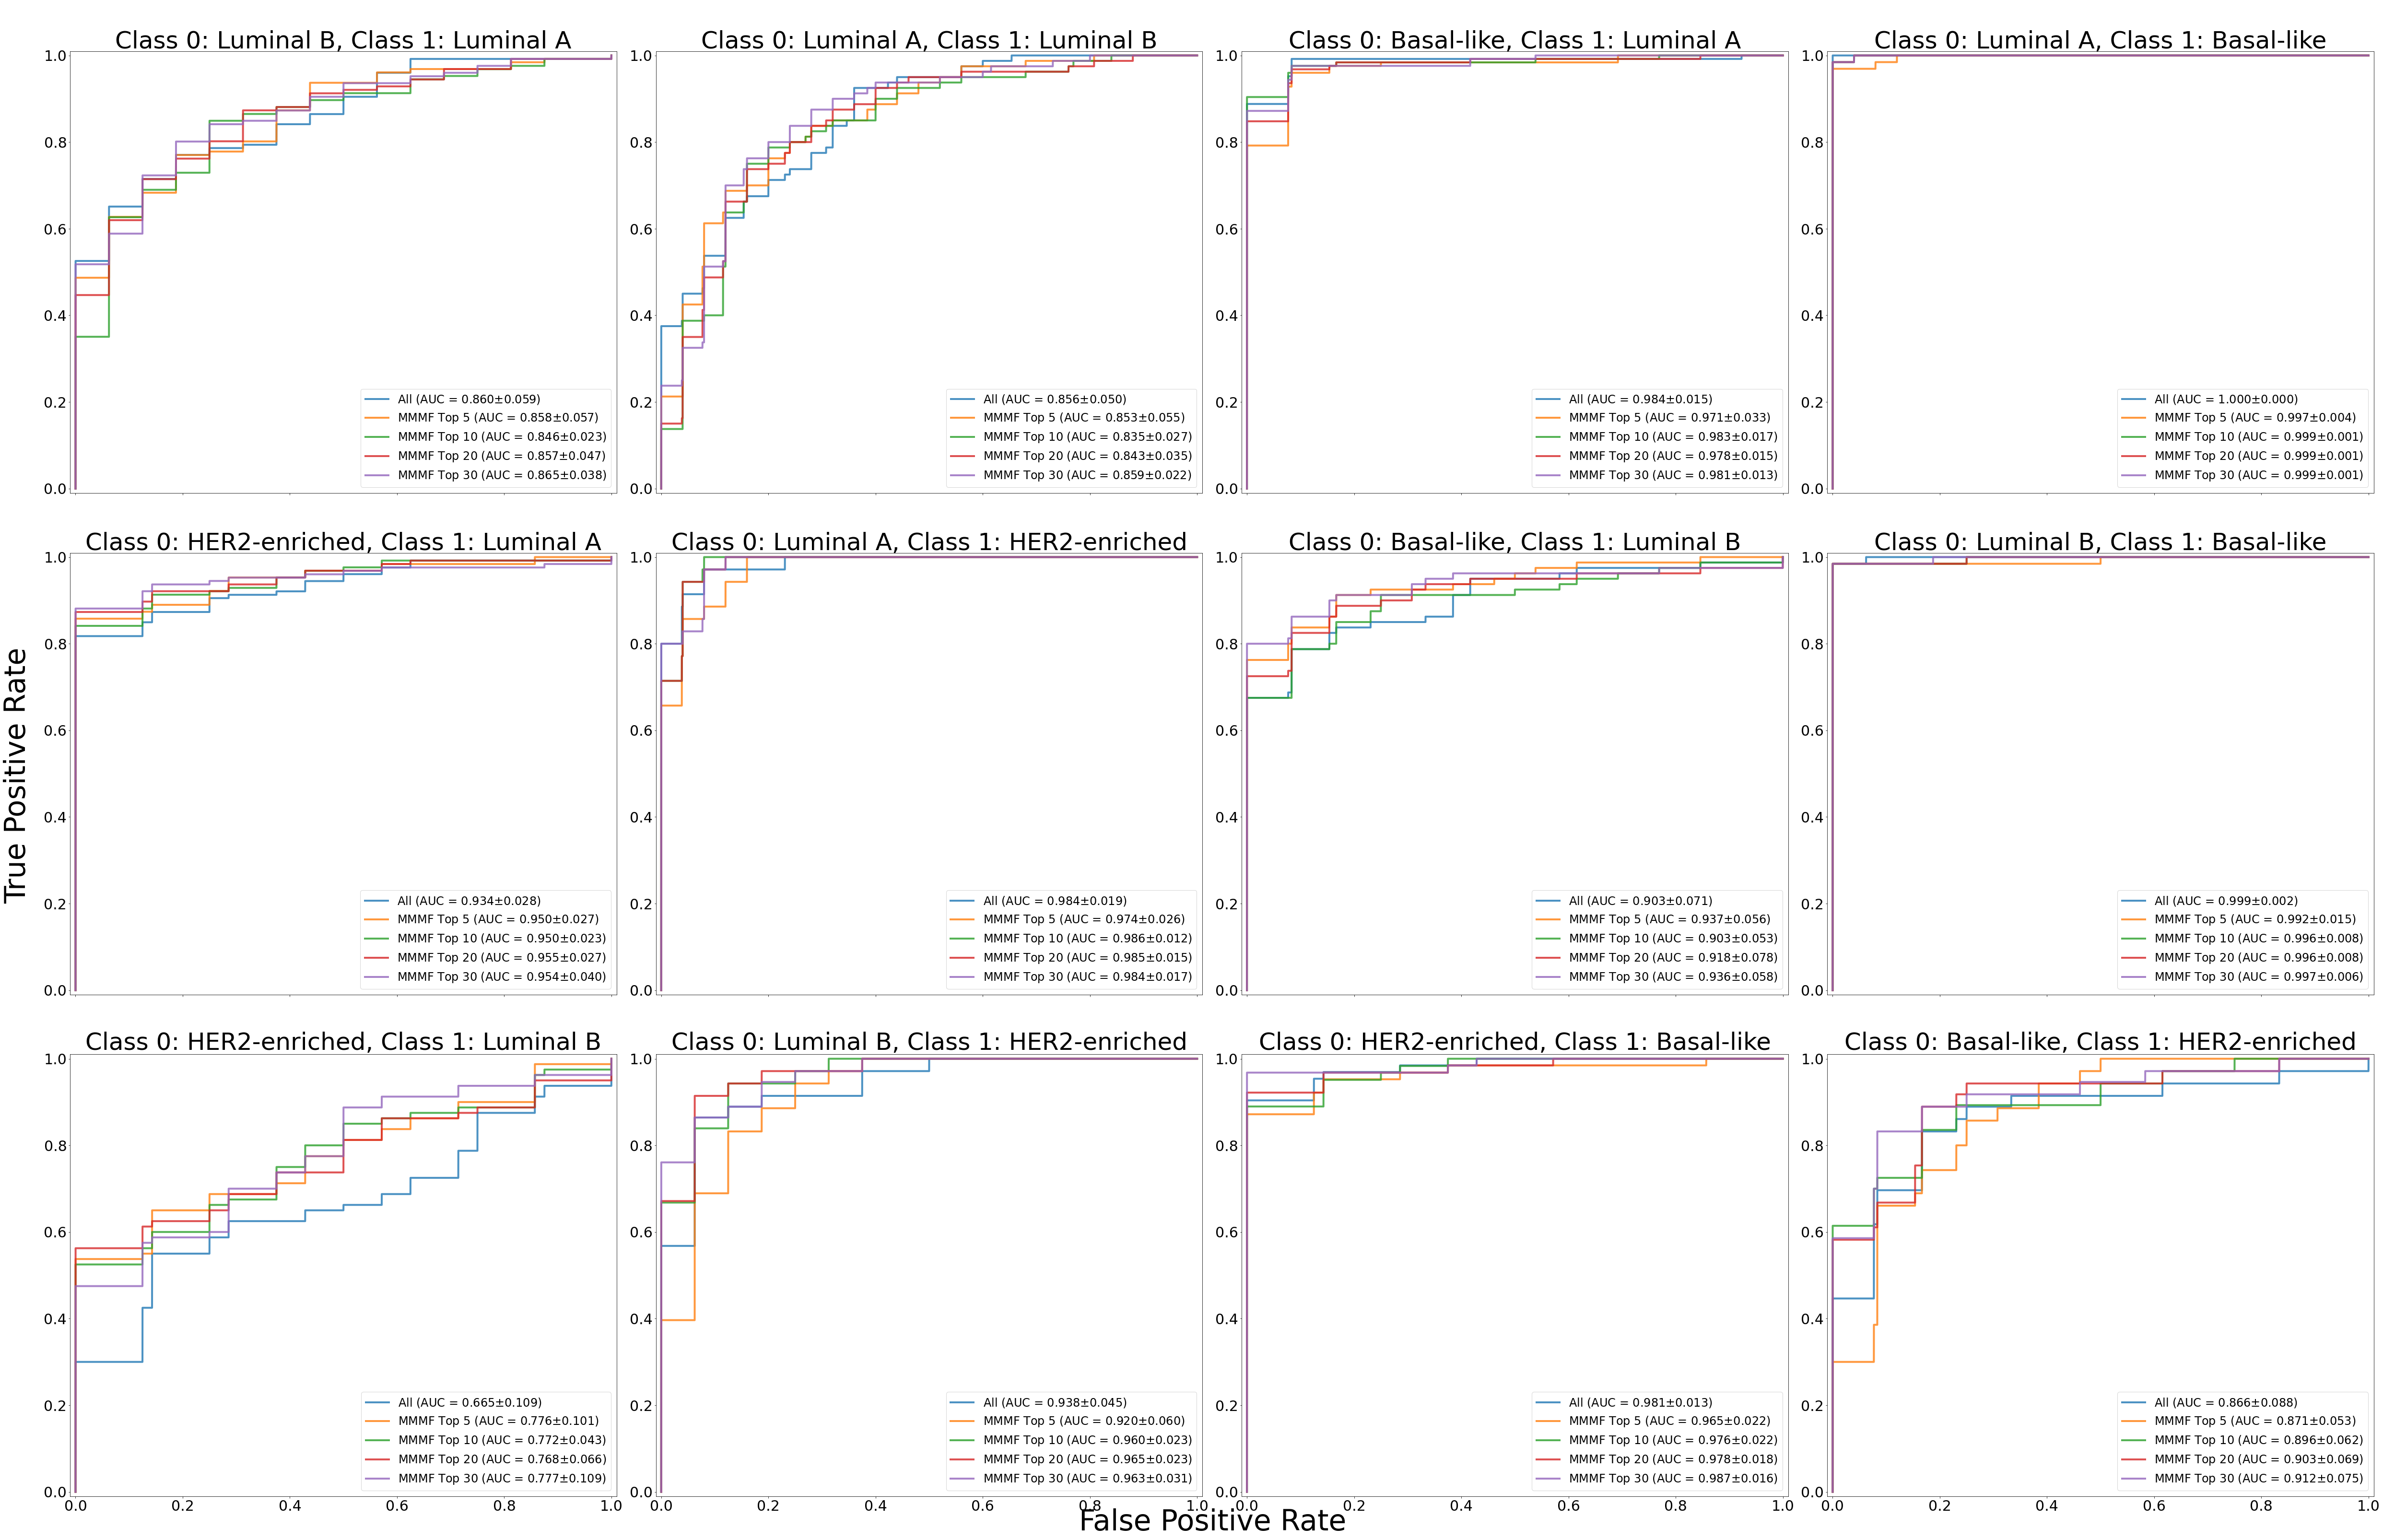

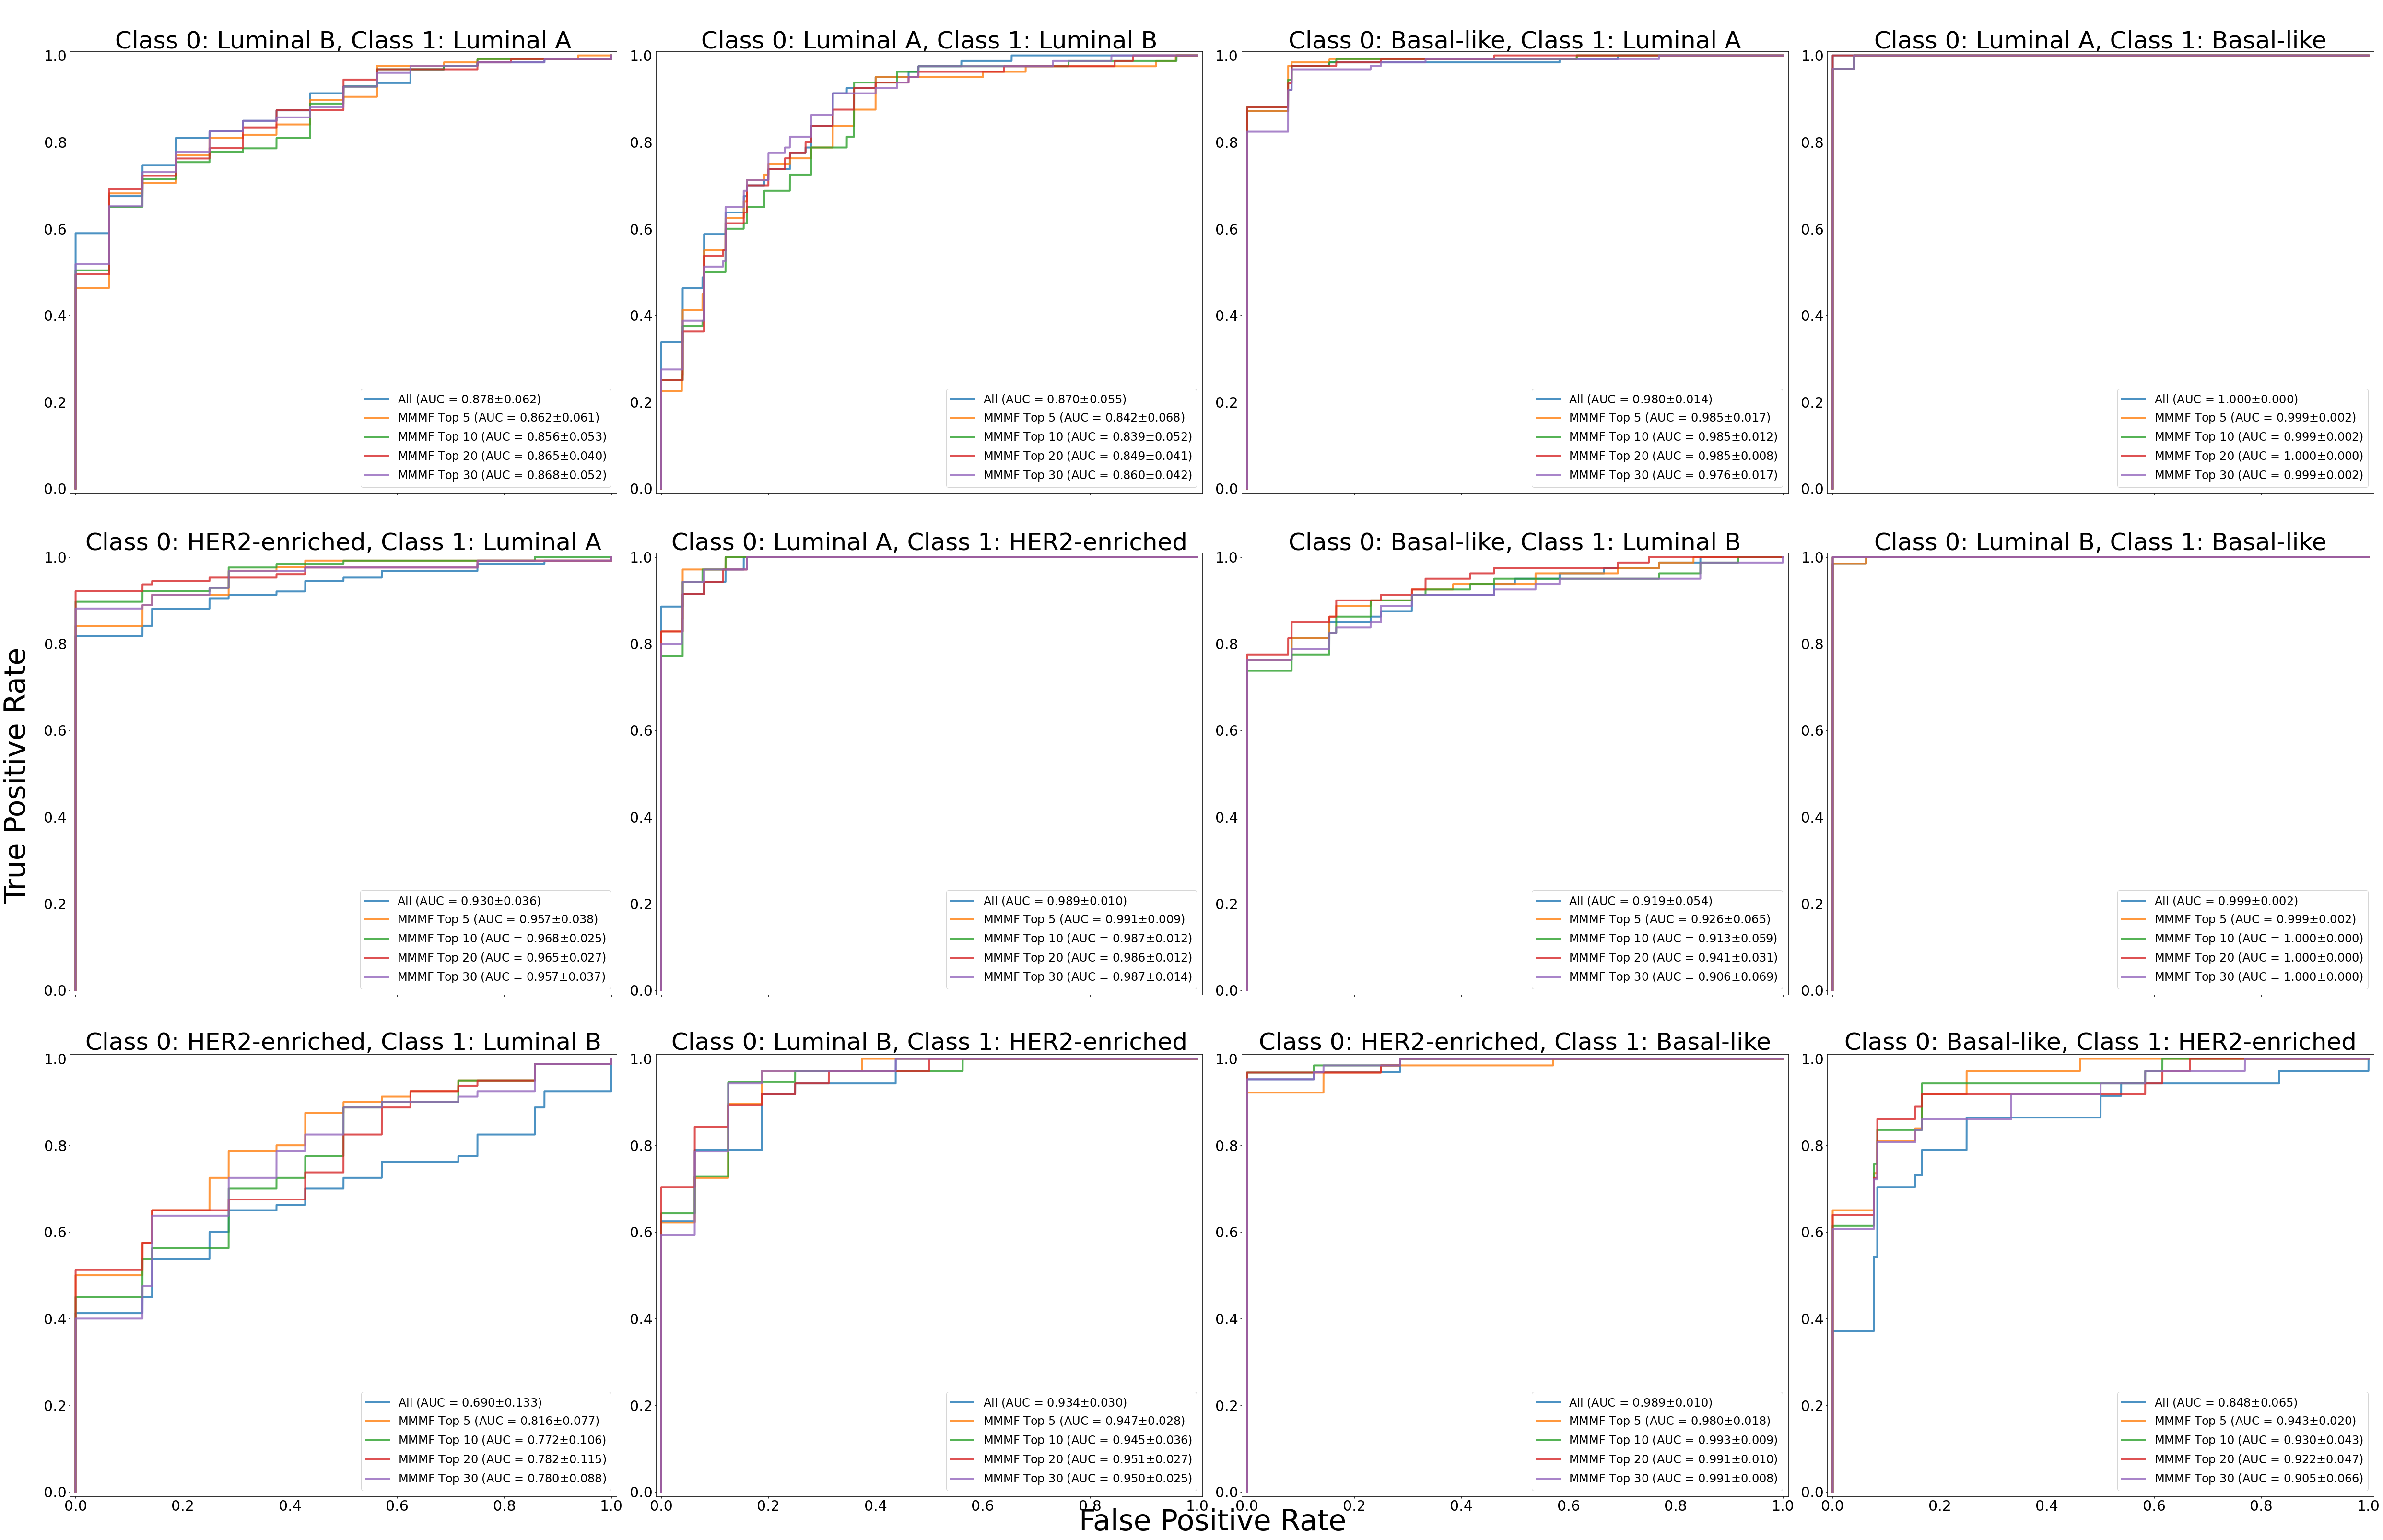

In [5]:
classes_combinations = []
class_list = [0, 1, 2, 3]
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
        
data_type = 'BRCA'

for mp in mp_list:
    fig, axes = plt.subplots(3, 4, sharex=True, figsize = (68, 45))
    
    for i, comb in enumerate(classes_combinations):
        c1 = comb[0]
        c2 = comb[1]
    
        ax = plt.subplot(3,4,i+1)
        feature_selection_roc_curve_plot2(ax, data_type, mp, model_list, c1, c2)
    
    fig.supxlabel('False Positive Rate',fontsize=60)
    fig.text(-0.015, 0.5, 'True Positive Rate', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Multi Class - BRCA - PR curve**
- 0: Luminal A
- 1: Luminal B
- 2: Basal-like
- 3: HER2-enriched

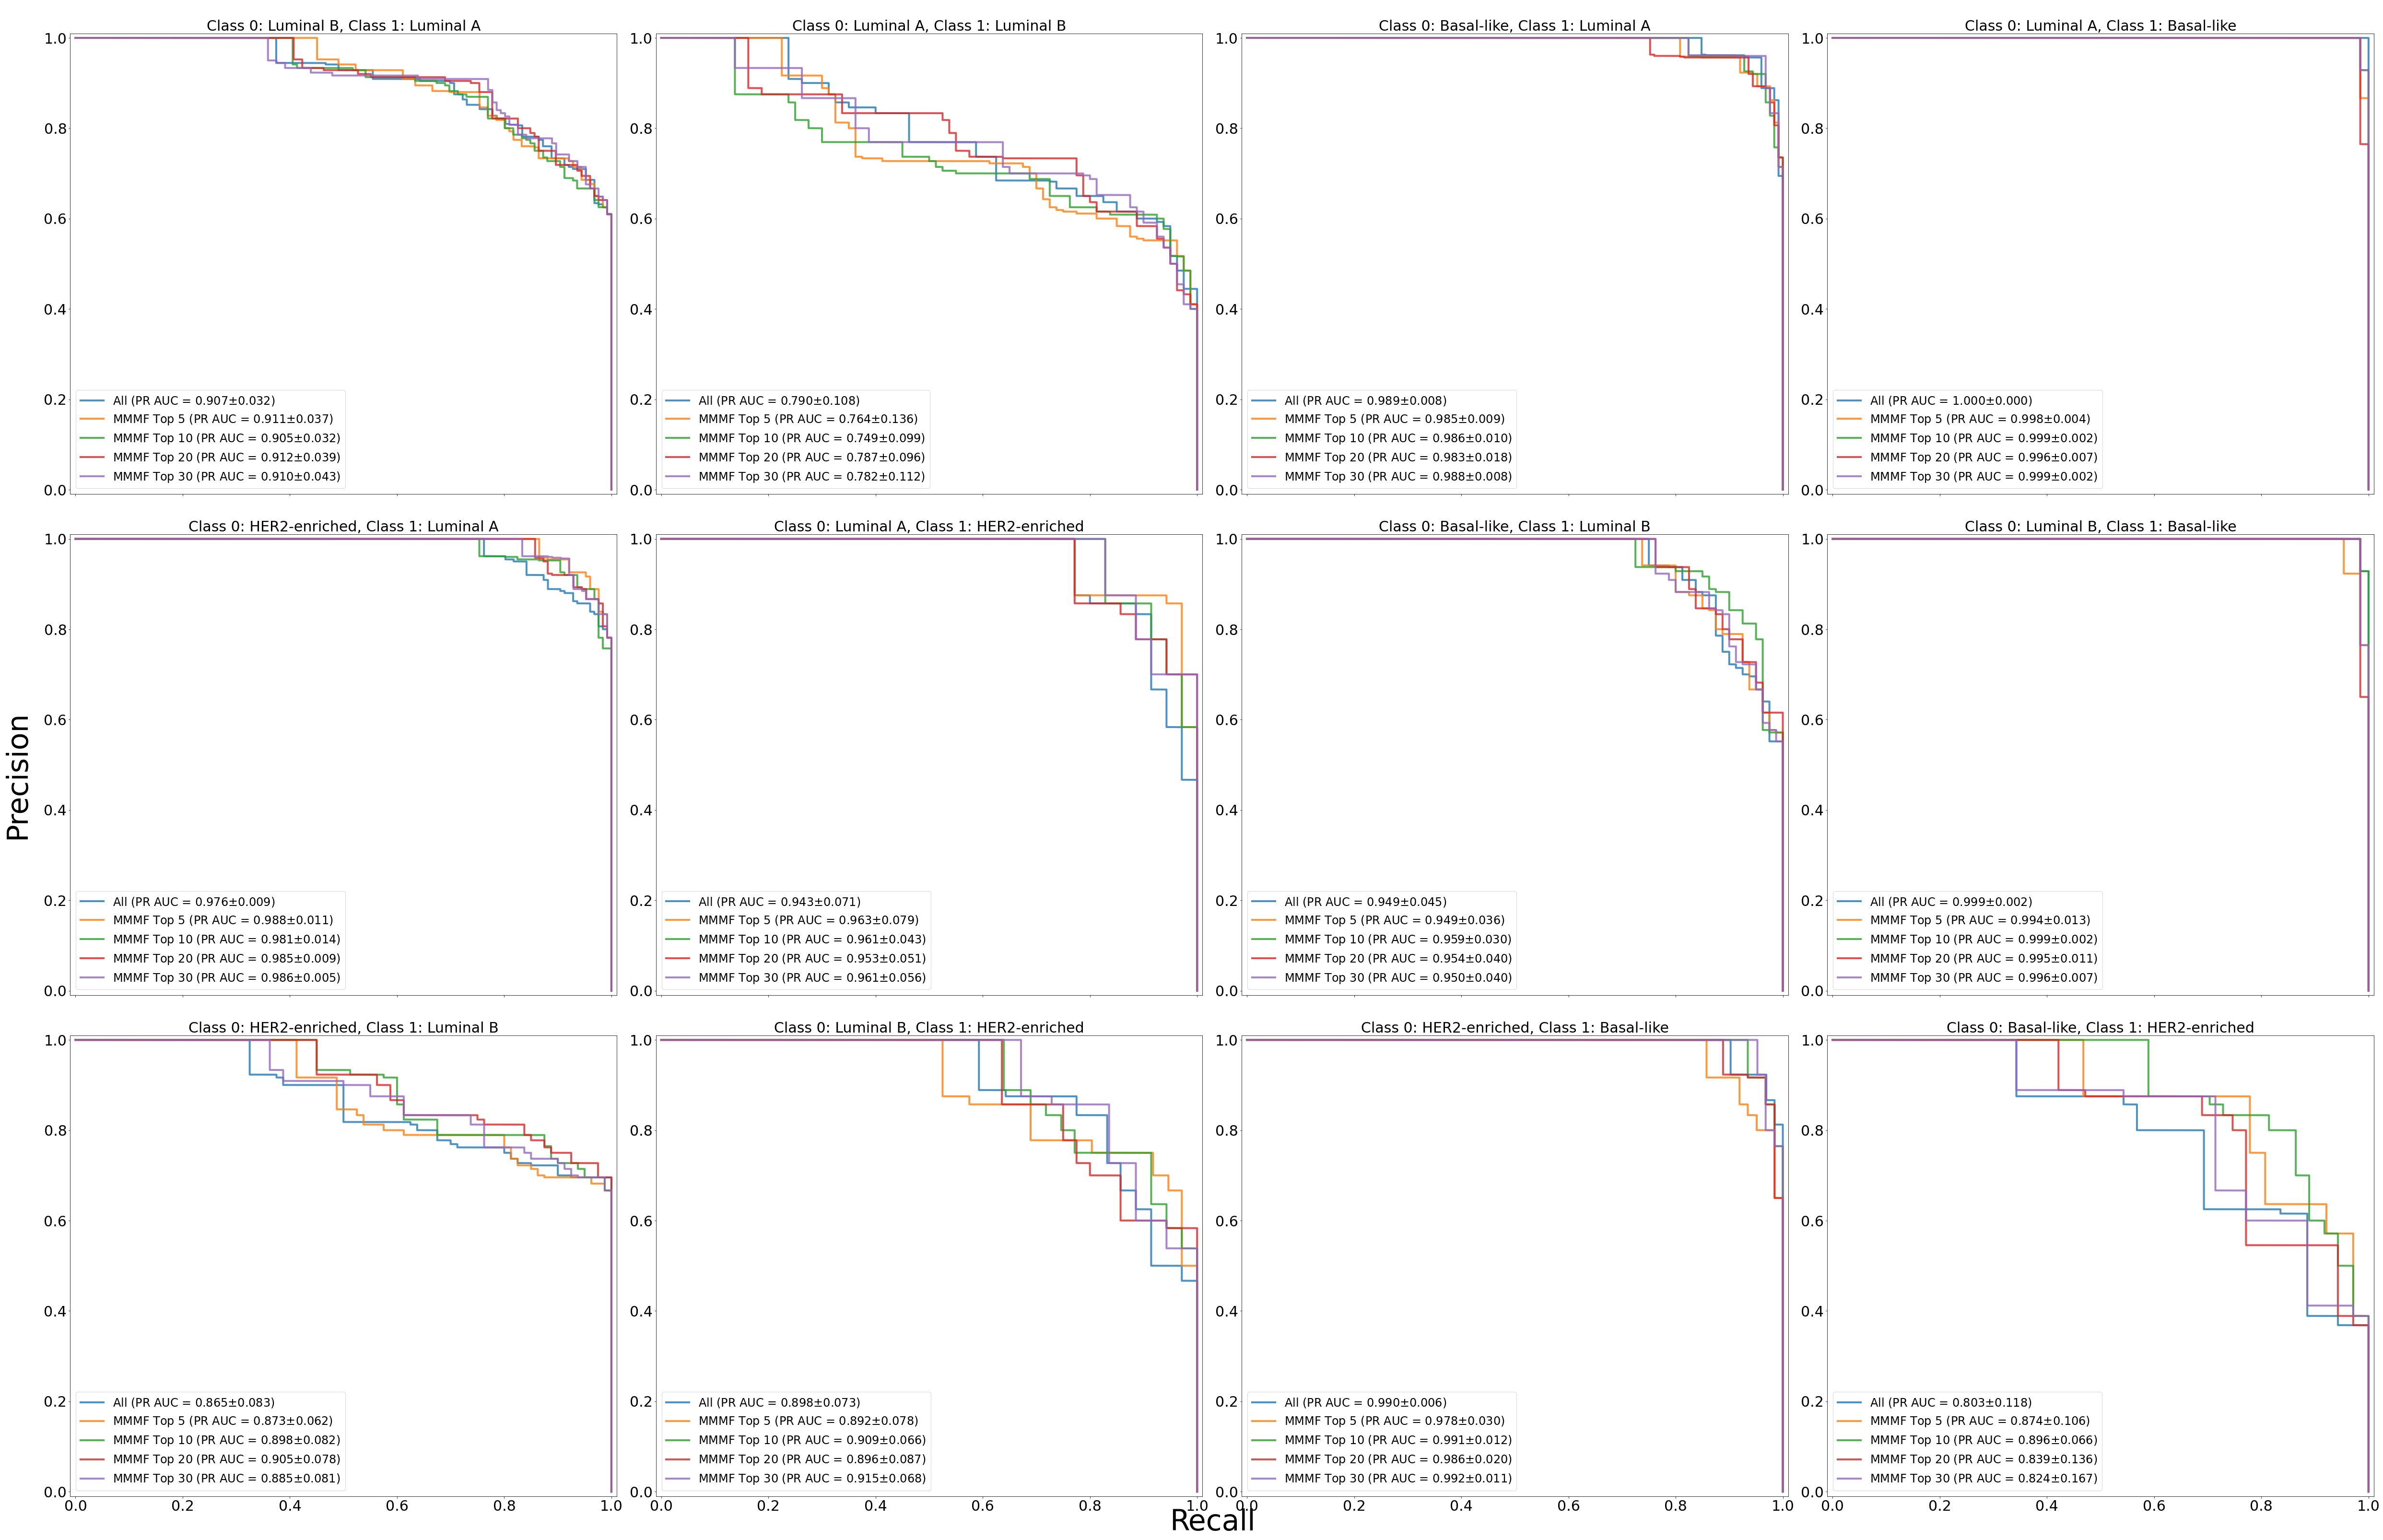

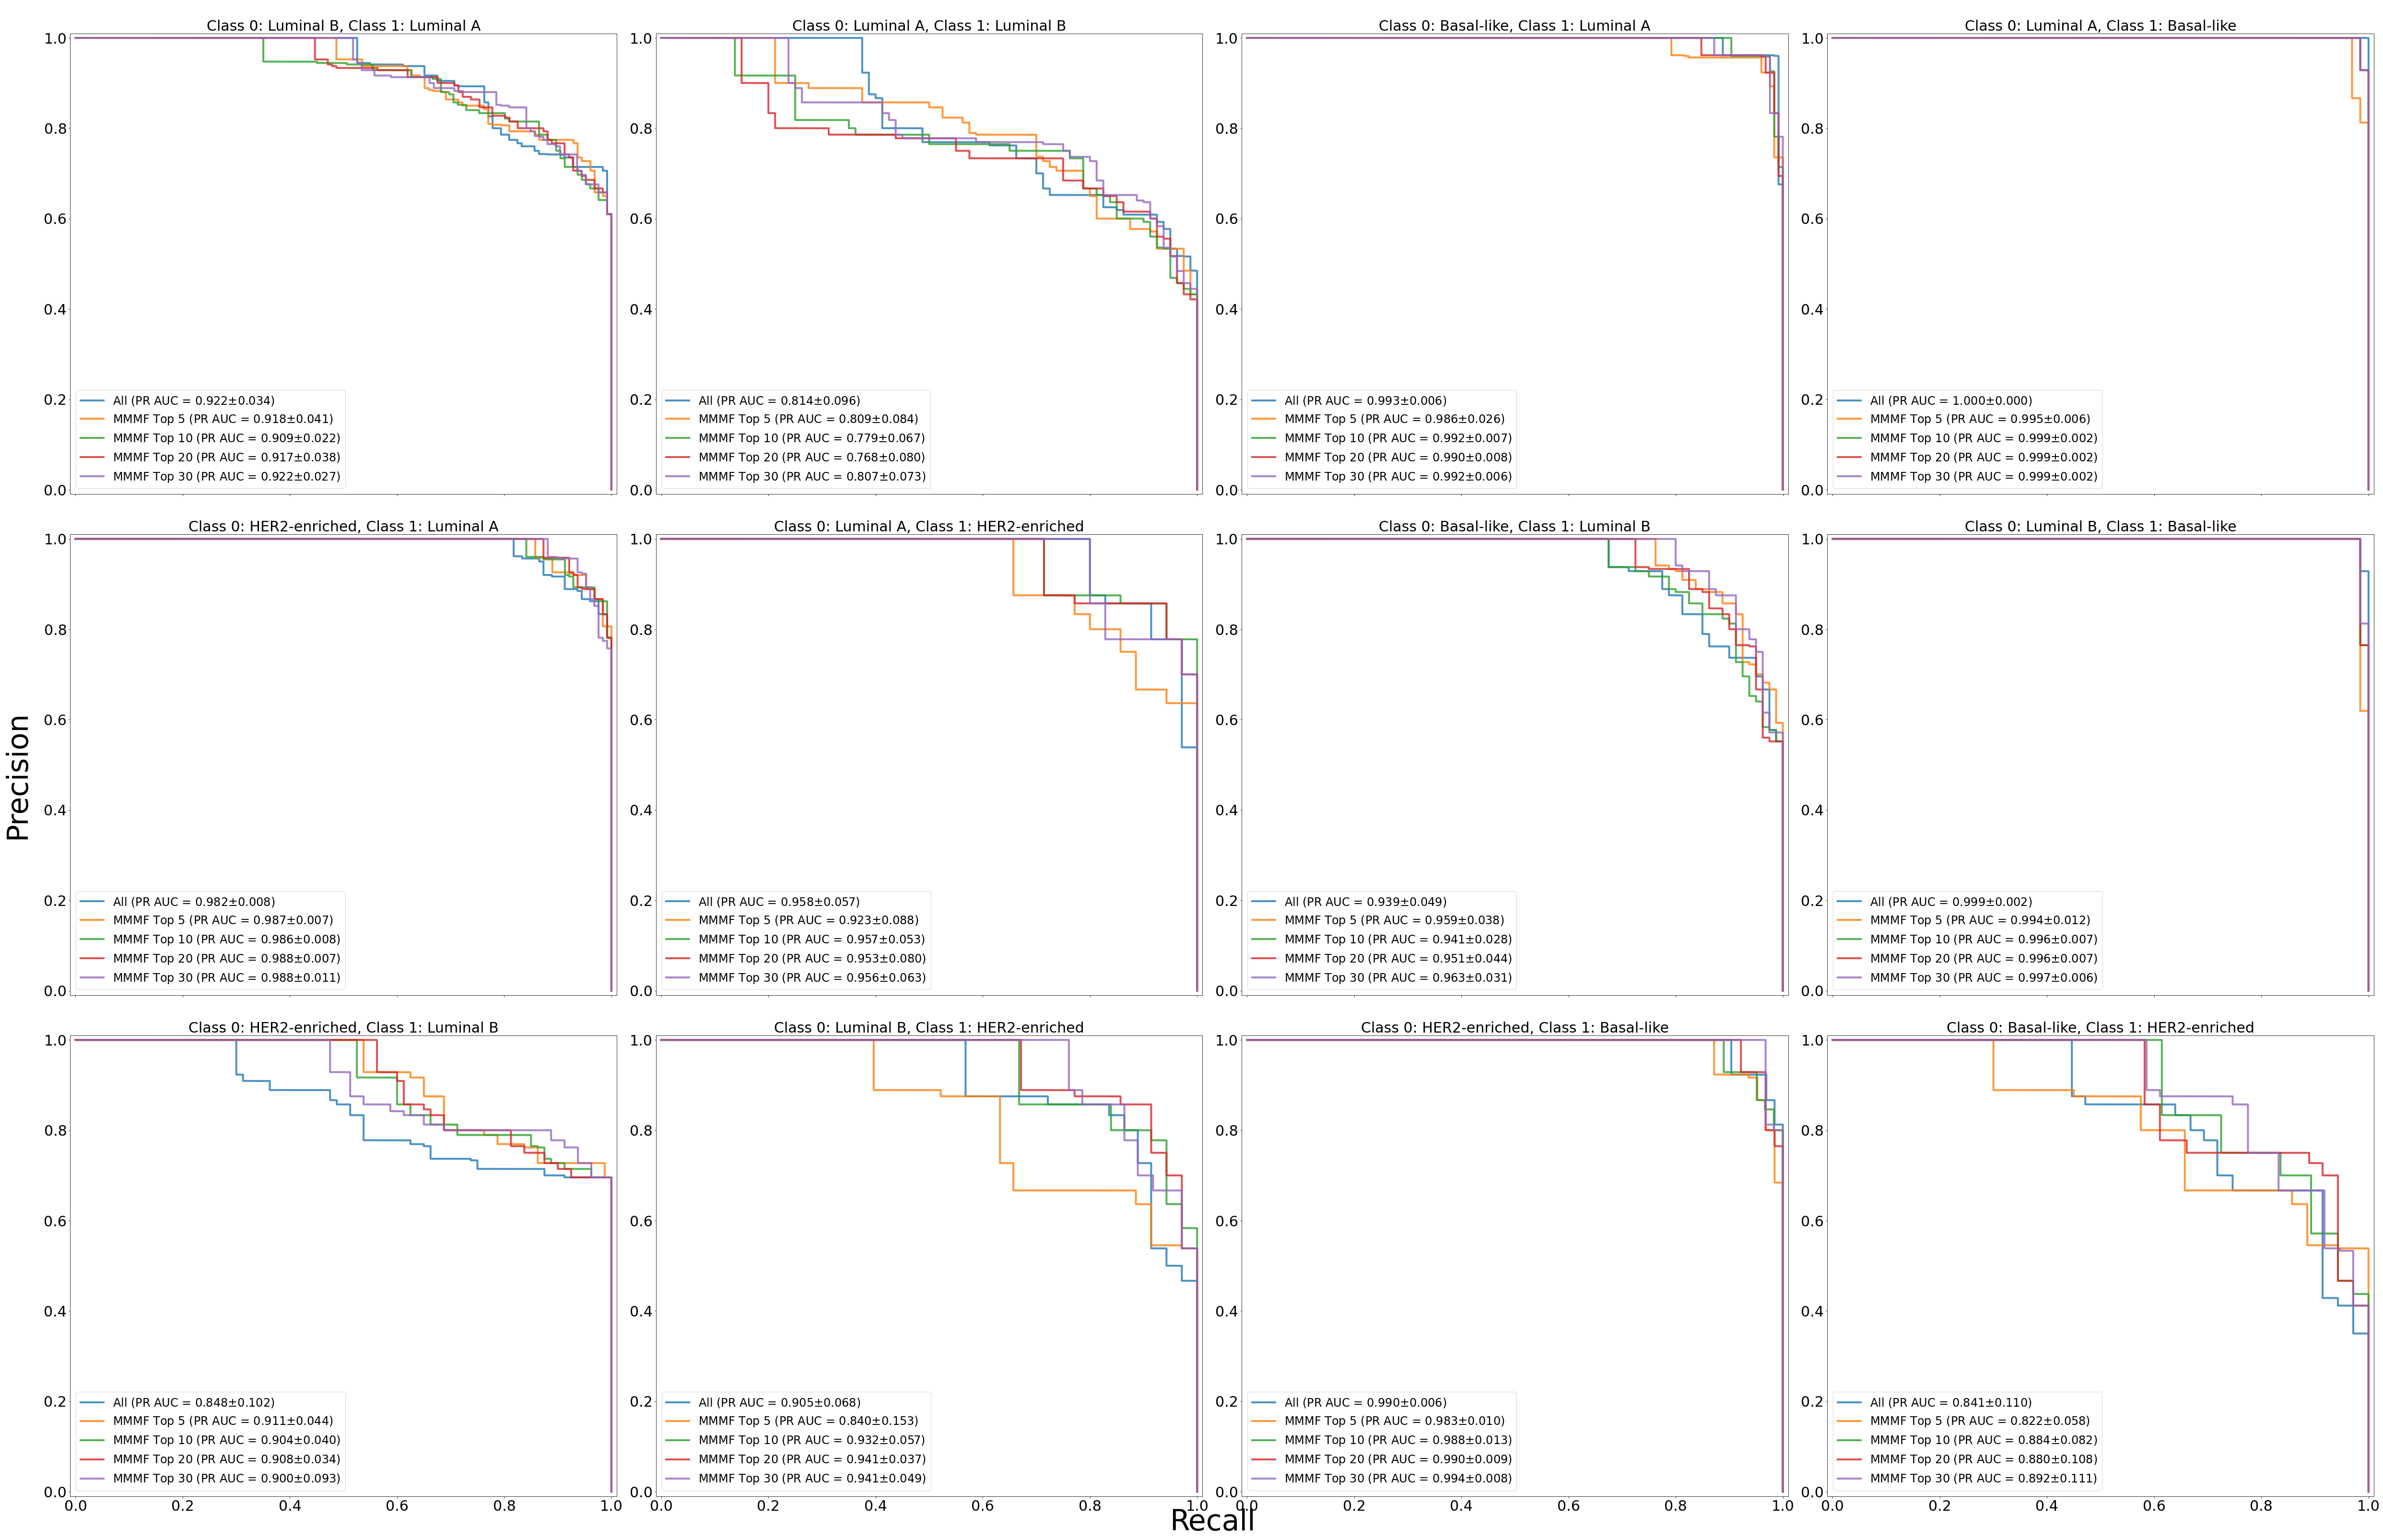

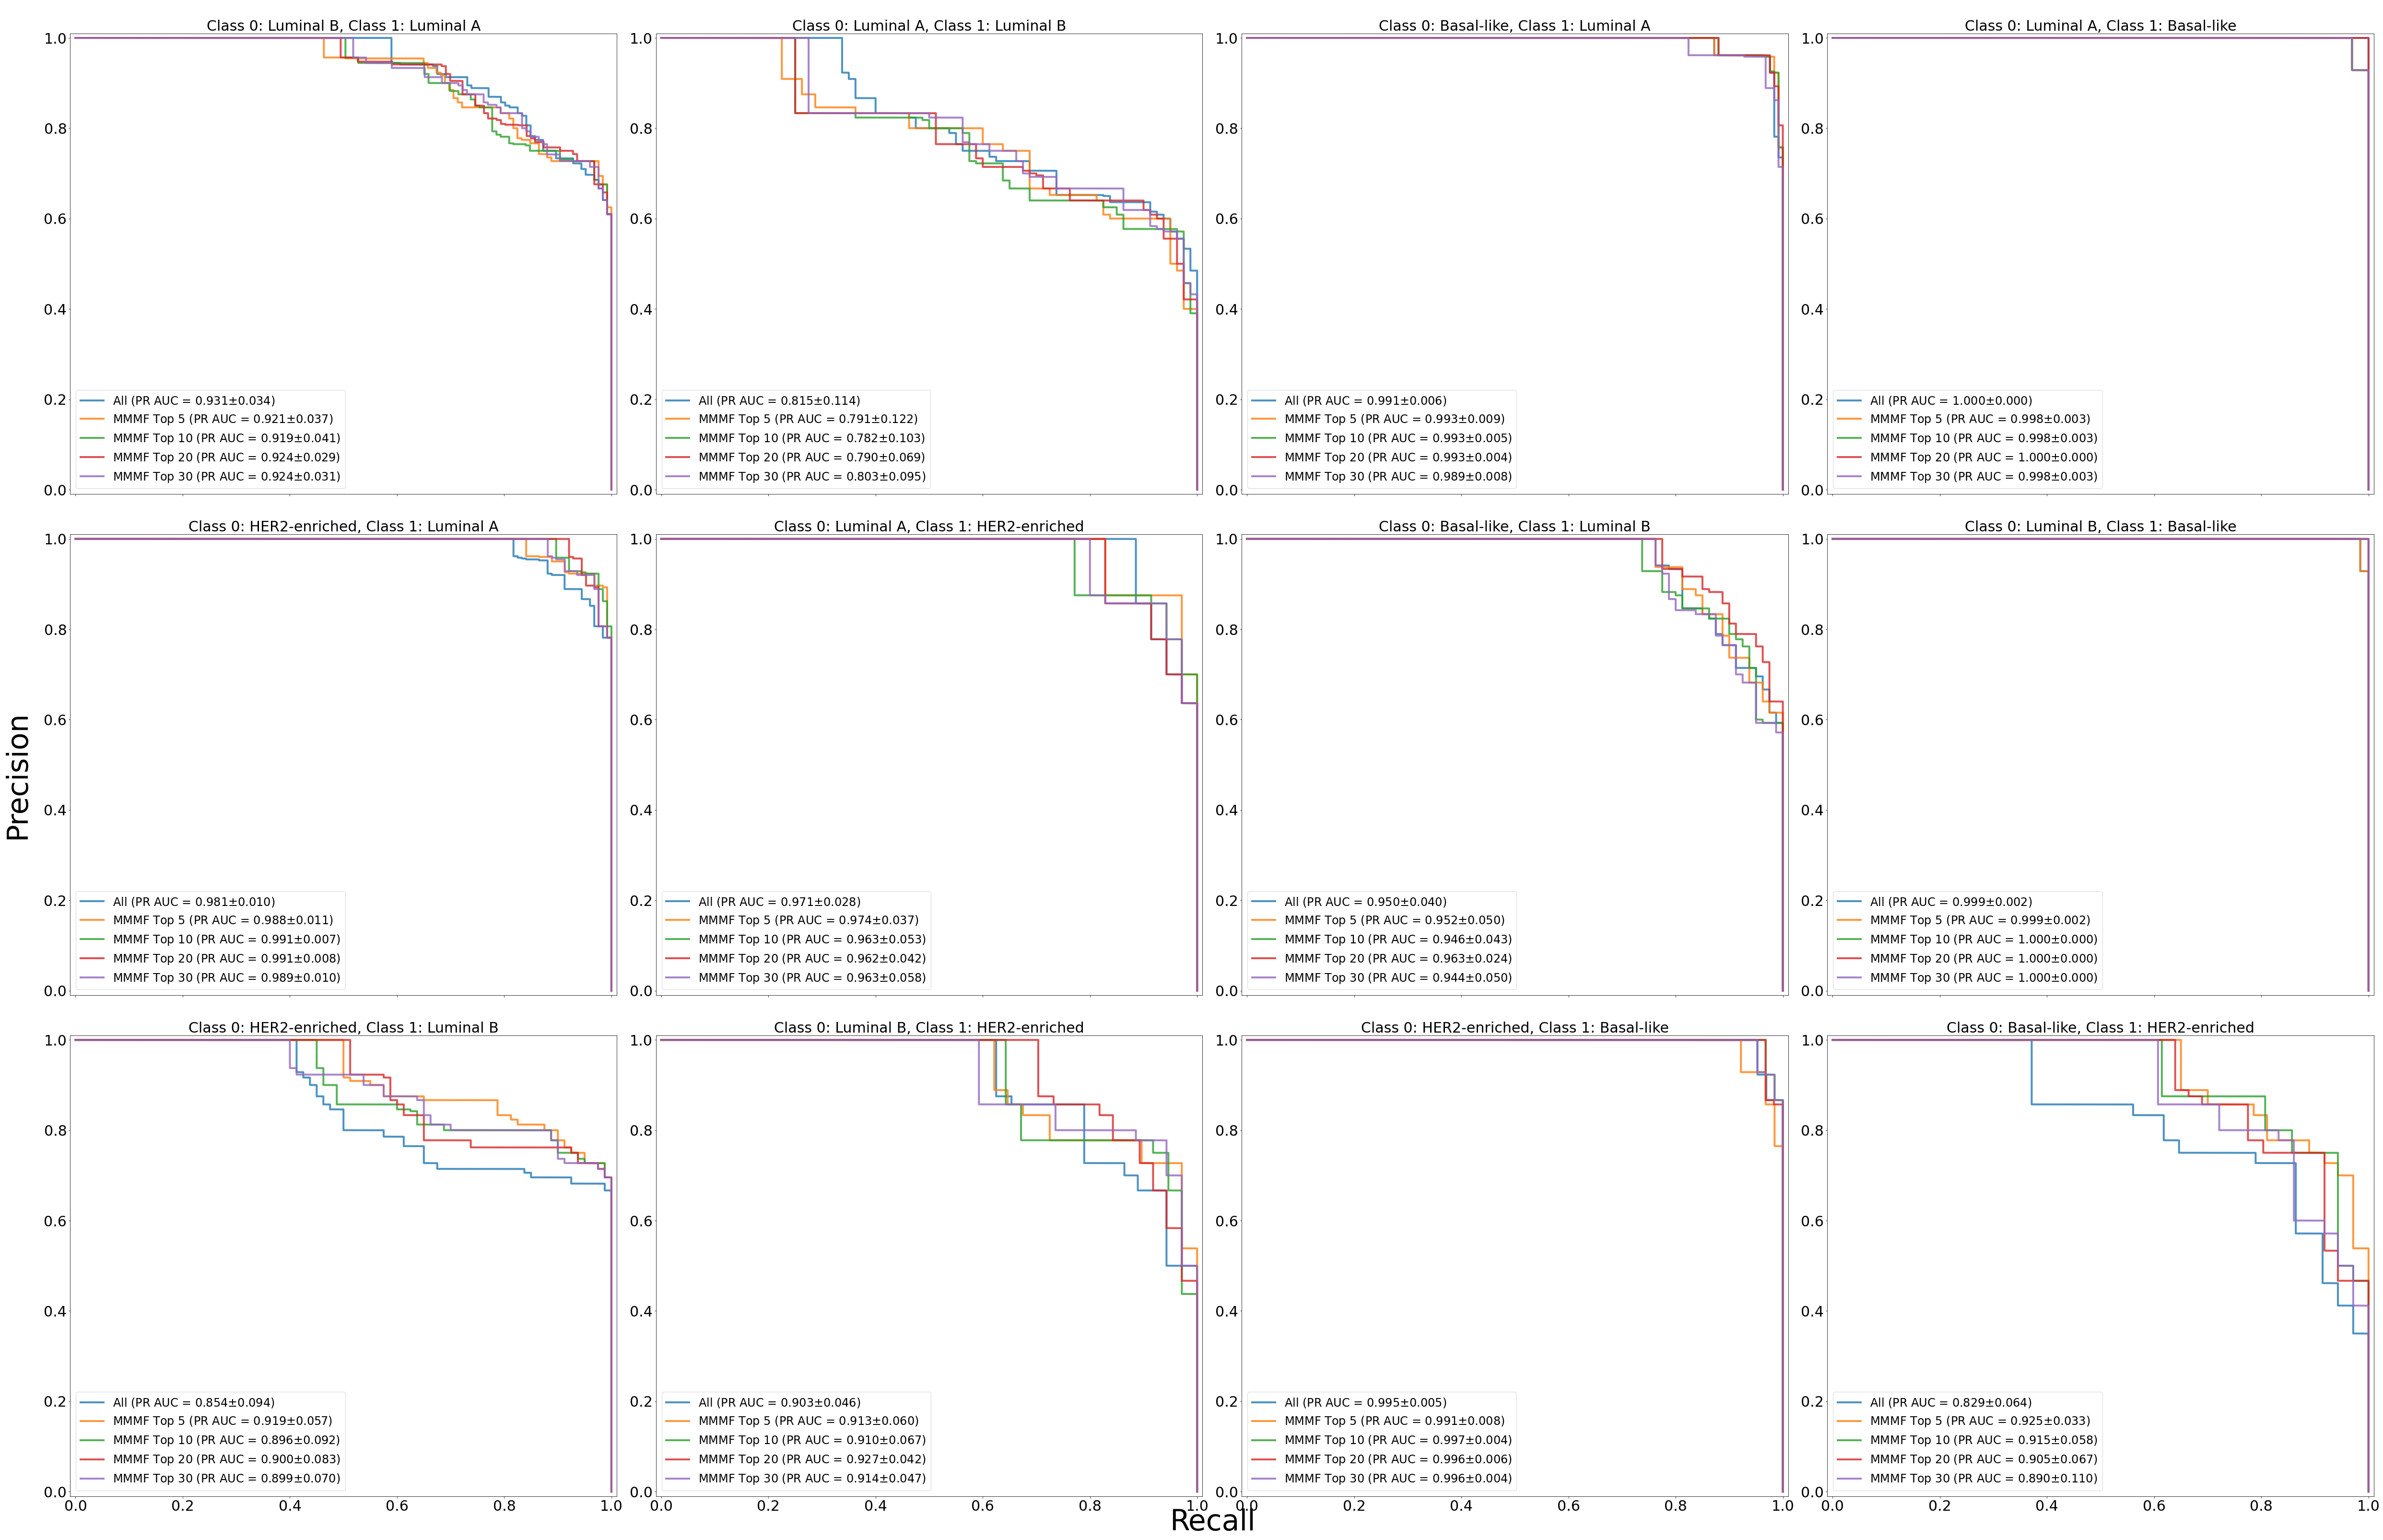

In [6]:
classes_combinations = []
class_list = [0, 1, 2, 3]
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
        
data_type = 'BRCA'

for mp in mp_list:
    fig, axes = plt.subplots(3, 4, sharex=True, figsize = (68, 45))
    
    for i, comb in enumerate(classes_combinations):
        c1 = comb[0]
        c2 = comb[1]
    
        ax = plt.subplot(3,4,i+1)
        feature_selection_pr_curve_plot2(ax, data_type, mp, model_list, c1, c2)
    
    fig.supxlabel('Recall',fontsize=60)
    fig.text(-0.015, 0.5, 'Precision', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()